<a href="https://colab.research.google.com/github/Maverick269/ML_Classification_Project/blob/main/Mobile_Price_Range_Prediction_Project_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Mobile Price Range Prediction Capstone Project**



* GitHub Id: https://github.com/Maverick269

* Linkedin Id: www.linkedin.com/in/aman-kumar-9598a61ab

* Contribution - Individual

* Name - Aman

# **Project Summary -**

The dataset provided contains specifications of 2000 mobile phones, with the goal of predicting their price range category, labeled from 0 (low cost) to 3 (very high cost). It includes 20 features such as battery power, RAM, camera resolution, internal memory, screen size, and network capabilities like 3G, 4G, and Wi-Fi support. All features are numeric or binary, and the dataset is clean with no missing values, making it well-suited for machine learning tasks. Key attributes like battery power and RAM show significant variation, indicating they may be strong predictors of price range. The problem is a multi-class classification task, and models such as Logistic Regression, Random Forest, Decision Tree, SVM, or K-Nearest Neighbors can be applied. The target variable, price_range, appears balanced, which is beneficial for training models without bias toward any class. A proper machine learning workflow would begin with exploratory data analysis (EDA), followed by feature scaling or transformation, model selection, and evaluation using metrics like accuracy, precision, recall, and F1-score. This project provides a good opportunity to explore how technical specifications influence market pricing and to develop a reliable model that could assist manufacturers or consumers in estimating the price category of a phone based on its features.

# <b><u> Project Title : Smartphone Price Classification Based on Technical Specifications </u></b>

## <b> Problem Description </b>

### The objective of this project is to develop a machine learning model that can accurately predict the price range of mobile phones based on their specifications. The dataset contains 2000 entries with 20 features including battery capacity, RAM, screen dimensions, camera quality, and network support (3G, 4G, Wi-Fi, etc.). The target variable, price_range, is categorized into four classes: low, medium, high, and very high. This classification task aims to identify patterns and relationships between hardware features and pricing tiers. The solution can help manufacturers, retailers, and consumers in product positioning, pricing strategies, and making informed purchasing decisions.


## <b> Data Description </b>

### <b>Attribute Information: </b>

*  battery_power:	Battery capacity of the mobile in mAh.
*    blue:	Bluetooth support (1 = Yes, 0 = No).
*  clock_speed:	Speed at which the microprocessor executes instructions (in GHz).
* dual_sim:	Dual SIM support (1 = Yes, 0 = No).
* fc:	Front camera resolution in megapixels.
* four_g:	4G network support (1 = Yes, 0 = No).
* int_memory:	Internal memory in GB.
* m_dep:	Mobile depth in cm (body thickness).
* mobile_wt:	Weight of the mobile phone in grams.
* n_cores:	Number of cores in the processor.
*  pc:	Primary camera resolution in megapixels.
*px_height:	Height of the screen in pixels.
* px_width:	Width of the screen in pixels.
* ram:	Random Access Memory (RAM) in MB.
* sc_h:	Height of the screen in cm.
* sc_w:	Width of the screen in cm.
* talk_time:	Maximum time that a single charge lasts during calls (in hours).
* three_g:	3G network support (1 = Yes, 0 = No).
* touch_screen:	Touchscreen support (1 = Yes, 0 = No).
* wifi:	Wi-Fi capability (1 = Yes, 0 = No).
* price_range:	Target variable: 0 = Low, 1 = Medium, 2 = High, 3 = Very High price range.

##**Import the dependancy**

In [16]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

pd.set_option("display.max_columns", 30)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15


In [17]:
# Import the data
path='/content/drive/MyDrive/Colab Notebooks/data_mobile_price_range.csv'
df=pd.read_csv(path)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Check first five rows of the data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [23]:
# Checking for null data
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


* From the above data we can understand that there are no null values present in the data

In [24]:
# Checking last five rows of the data
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


* **So we need to convert it into integer type**
* **Also we can check all the data could be int.**

In [25]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [26]:
# Check for data info for better understanding of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [27]:
df.shape

(2000, 21)

## Nearest Neighbours Imputations (KNN)

Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

Let’s take the above example of the dataset to see how it works.

* Before using KNN Imputer we need to replace 0 with NAN values. so that it will work.

In [28]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

In [29]:
# import KNN imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [30]:
# Checking shape
df.shape

(2000, 21)

In [31]:
# Checking How many observations having sc_w value as 0.
df[df['sc_w']==0].shape[0]

0

**Thus we have handled the mismatched values of the data.**

## **Exploratory Data Analysis (EDA)**

**Let's have look at target variable first.!**

In [32]:
# lets have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

,count
price_range,
1.0,500
2.0,500
3.0,500
0.0,500


Wow.! we have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.

This is the target variable with value of

* 0=low cost,
* 1=medium cost,
* 2=high cost,
* 3=very high cost.

<Axes: ylabel='count'>

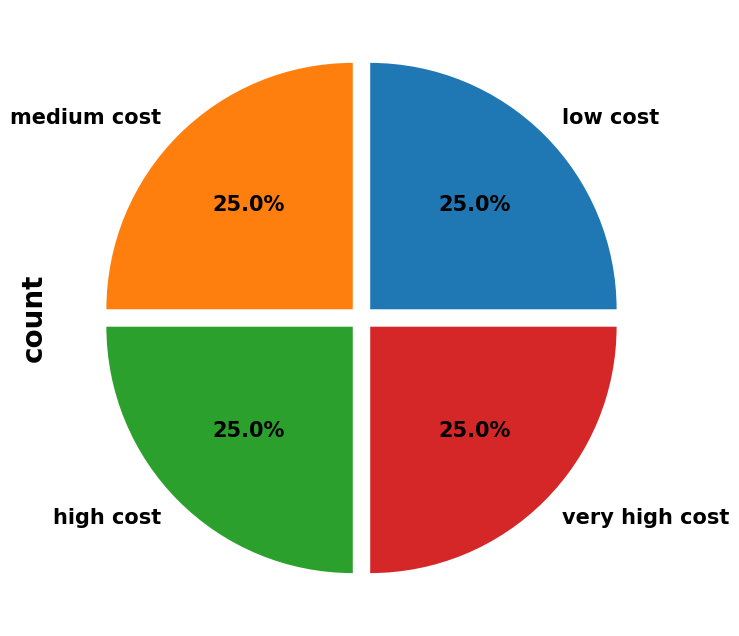

In [33]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart

We can see that our target varibale is equally distributed.
Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.

## **Correlation of target varaible i.e Dependent variable with the other independent variable.**

<Axes: >

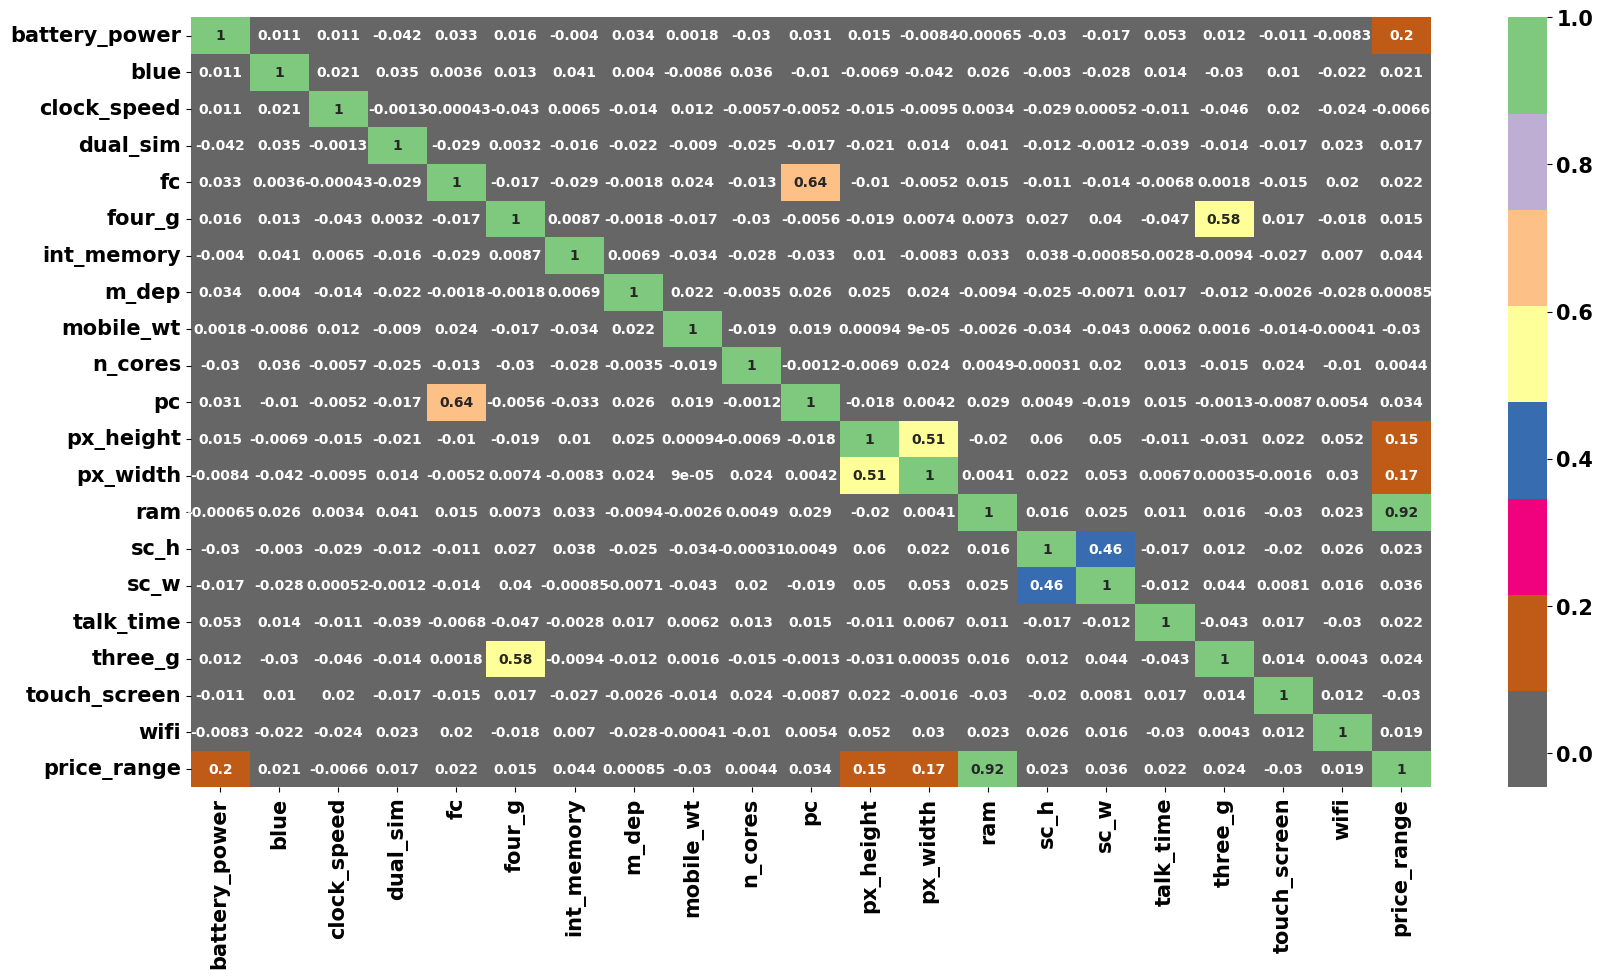

In [34]:
corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

## **Insights we found**

* RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.

* Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.

* Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.

* Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

* primary camera i.e pc and front camera fc are positively correlated.

* sc_h and sc_w are positively correlated.

In [35]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Relation Between RAM,Battery_power,px_height and px_width

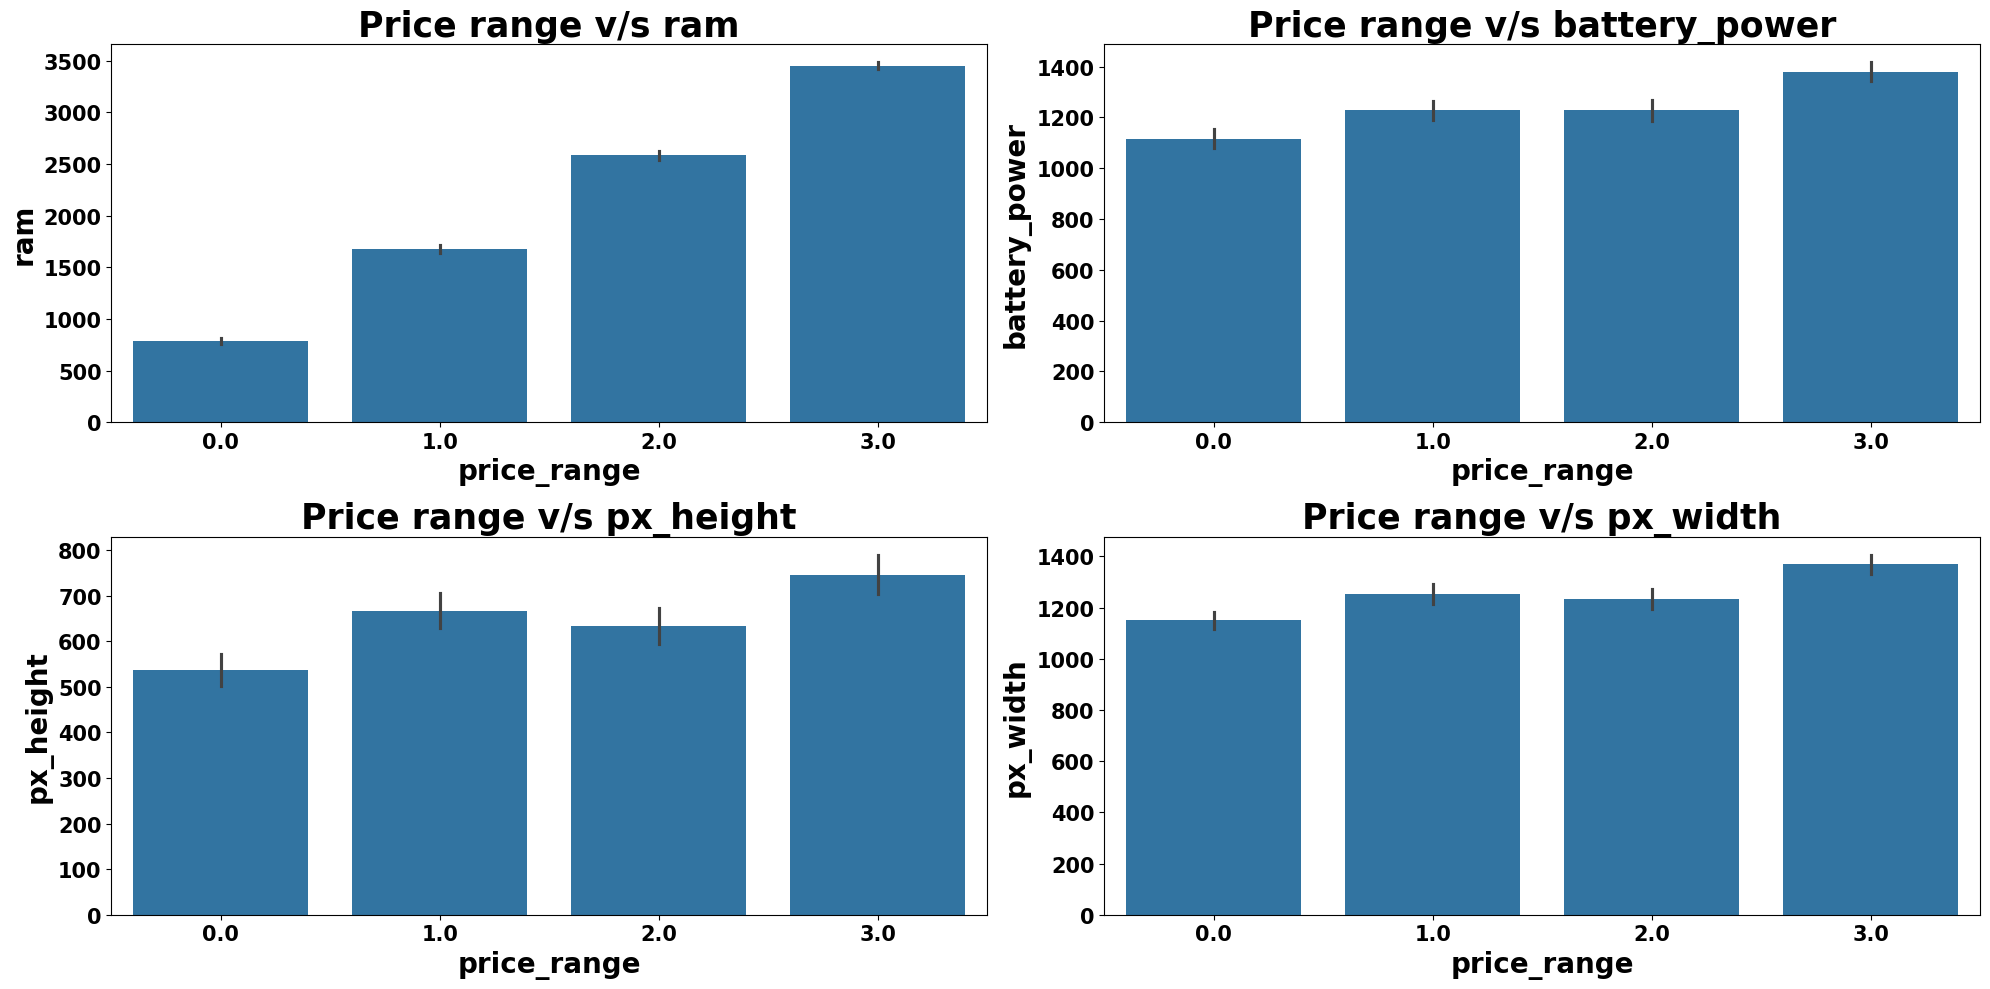

In [36]:
# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['price_range'],y=df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()


## Insights we found:
* Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.
* Mobiles having RAM less than 1000 MB falls under low cost category.
* Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.
* Mobiles with more than 700 pixel height and width more than 1300 has very high cost.


In [37]:
# Checking the counts of binary categorical variables by grouping price range.
grup_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()

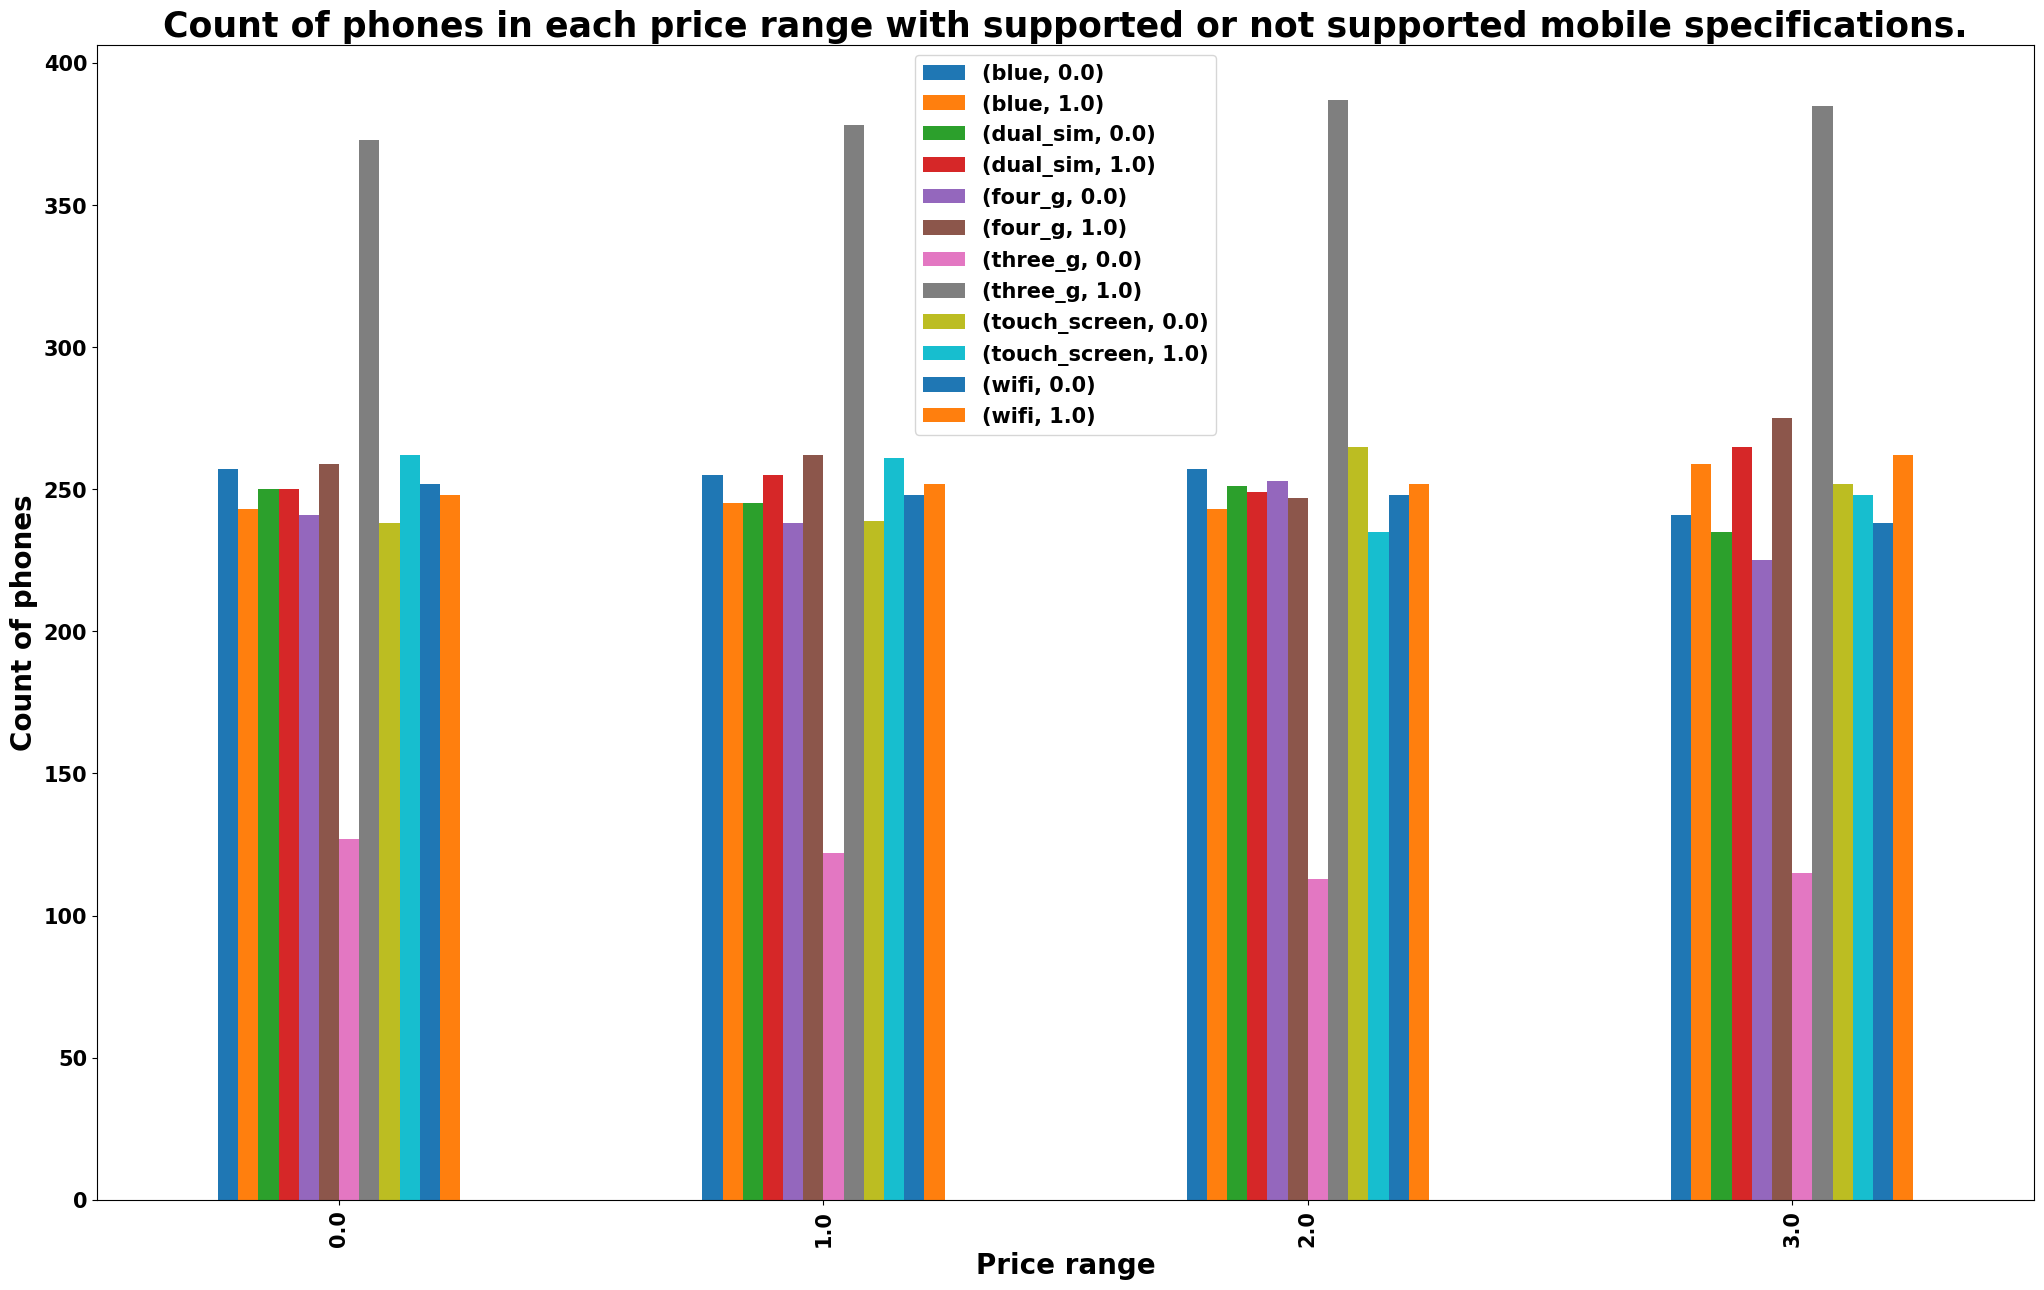

In [38]:
# visualising by plotting barchat.
# plt.figure(figsize=(12,6))
grup_by_price.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')

## Insights we found:
* We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.



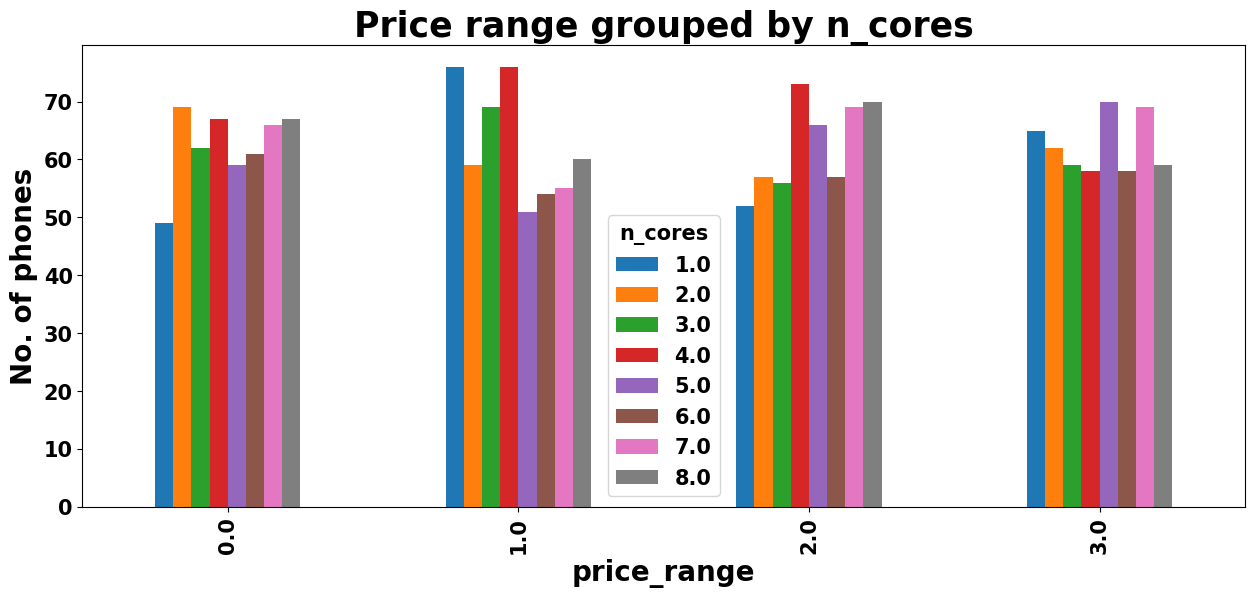

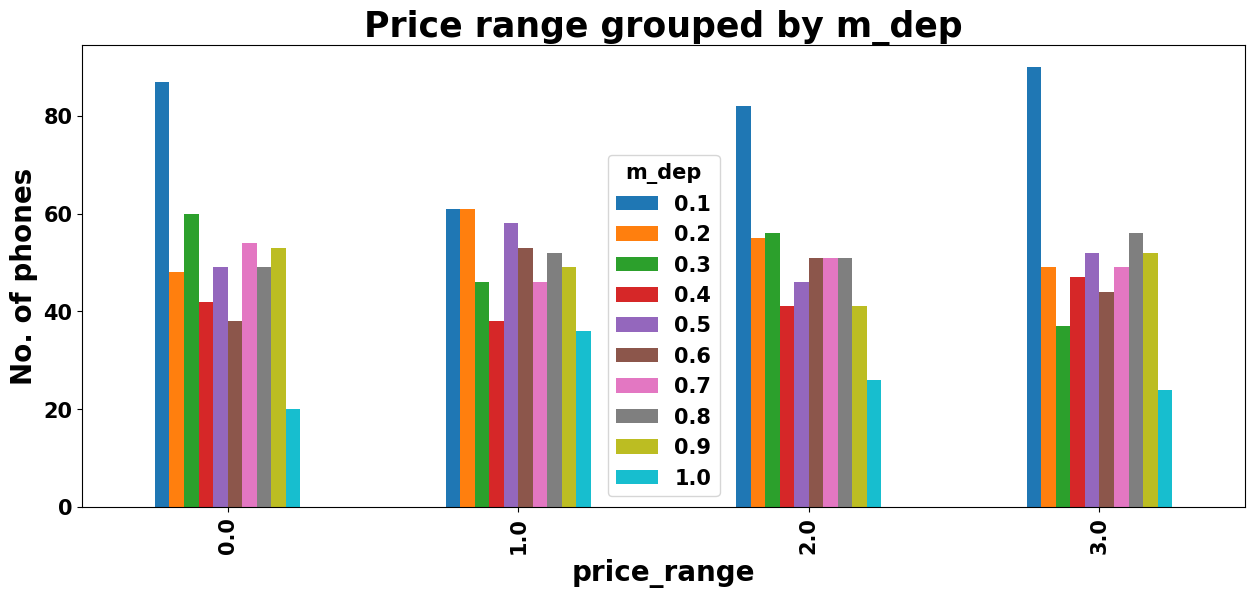

In [39]:
list_2=['n_cores','m_dep']
for item in list_2:

  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,6))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')


## Insights we found:
* There are very few mobiles in price range 0 and 1 with lesser no of cores.

* Most of the mobiles in price range 2 and 3 are with high no of cores.

* Number of phones with less thickness is high and count of phones with high thickness is low.

* So, we have **77.88%** data as **credit not default** and **22%** data as **credit default**.
* So, our data is highly **Imbalanced**.

## **Data Cleaning**

### **Checking the missing values**

In [40]:
# check for the null values
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


* So our data have **no null values.**

## Which numerical feature is driving the price range most

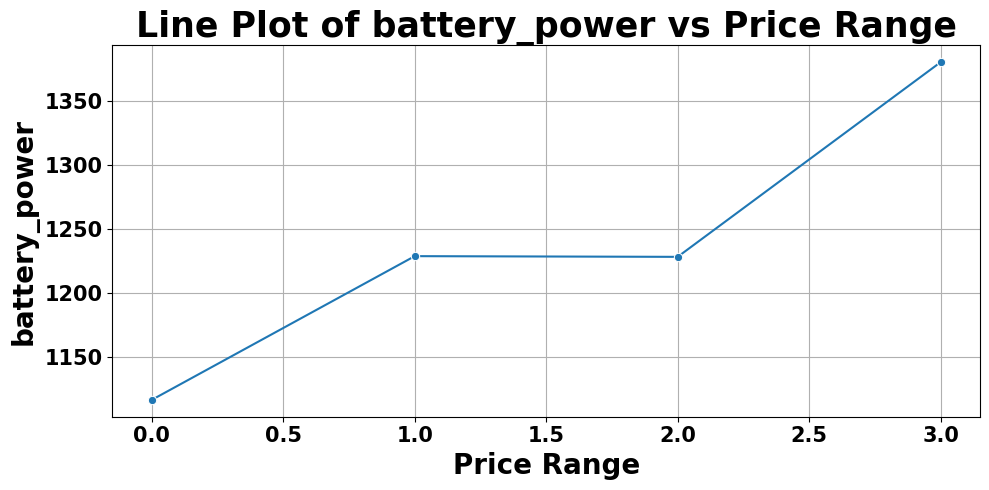

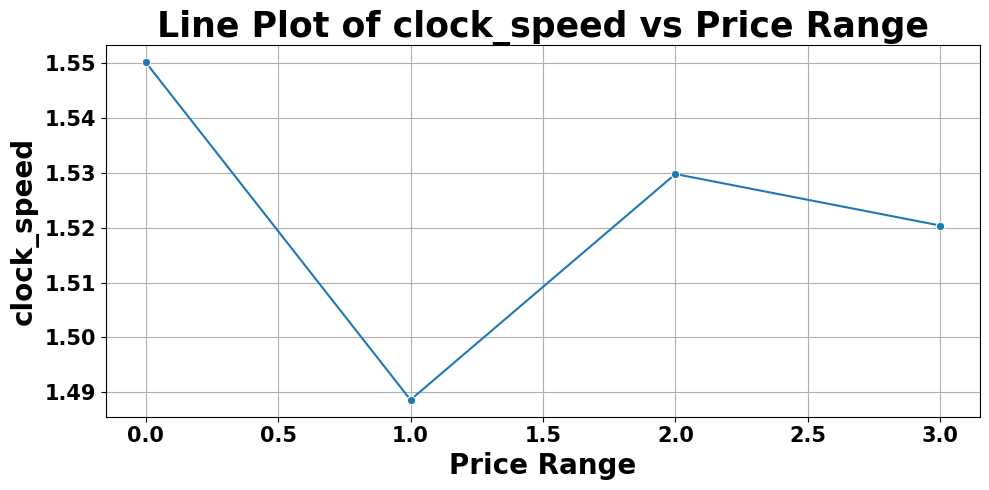

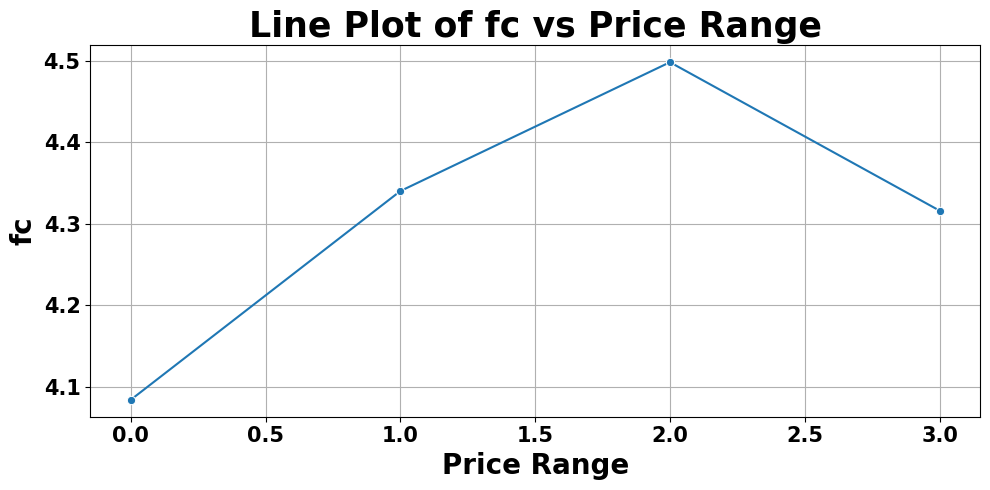

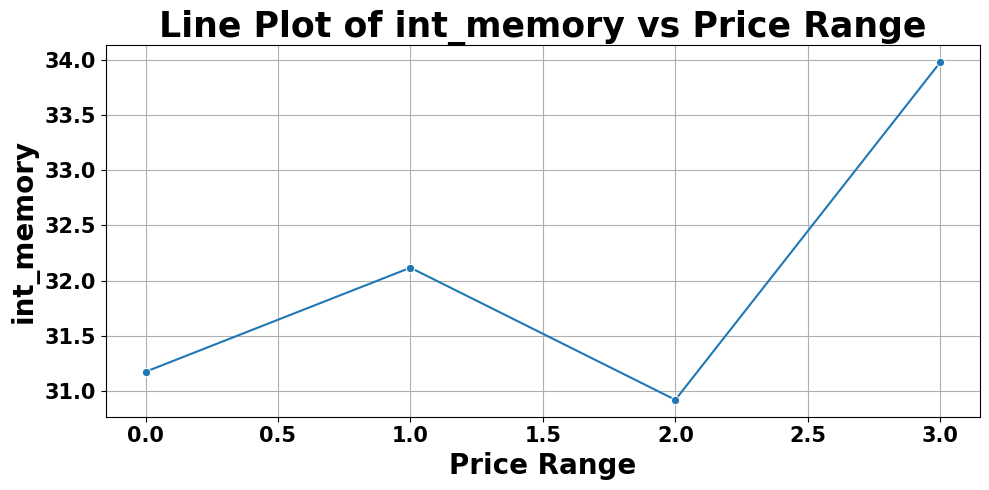

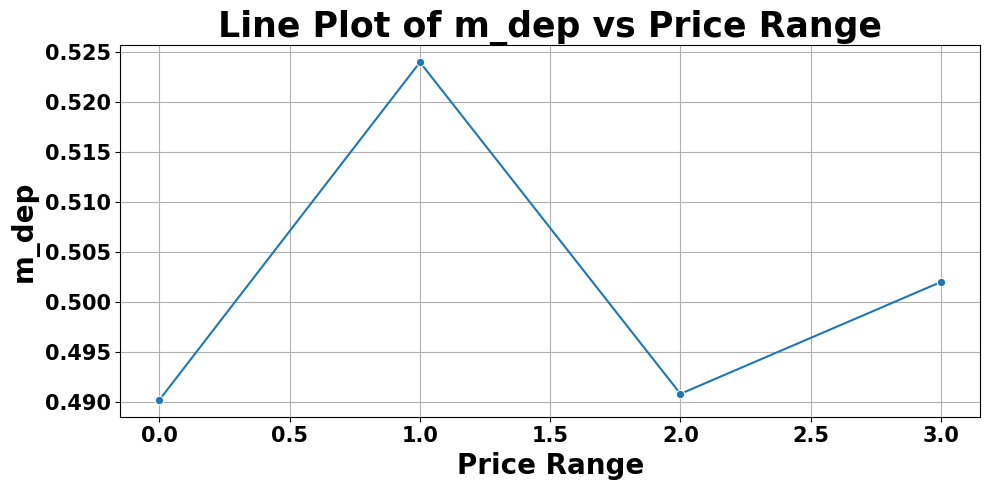

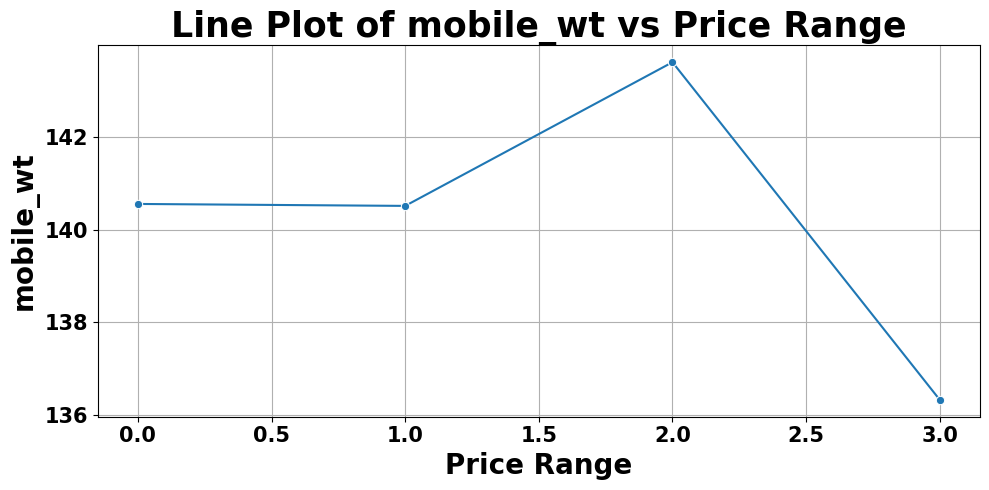

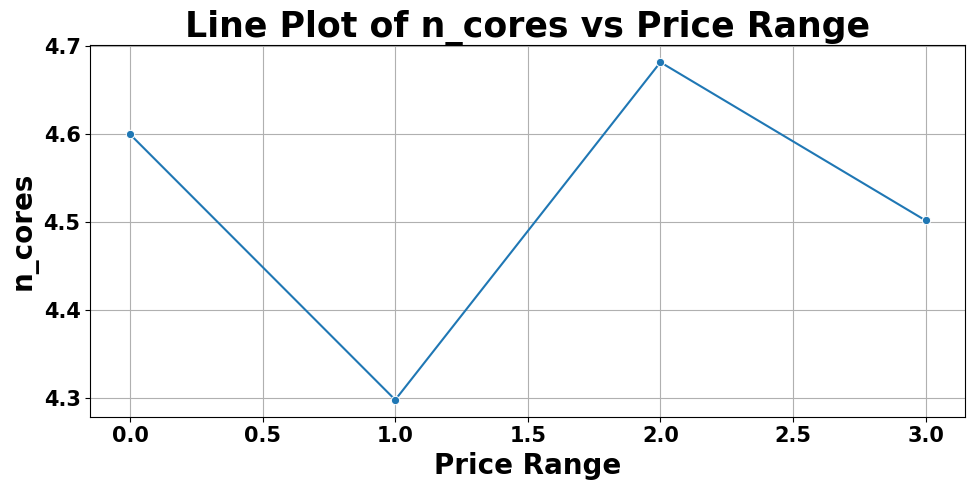

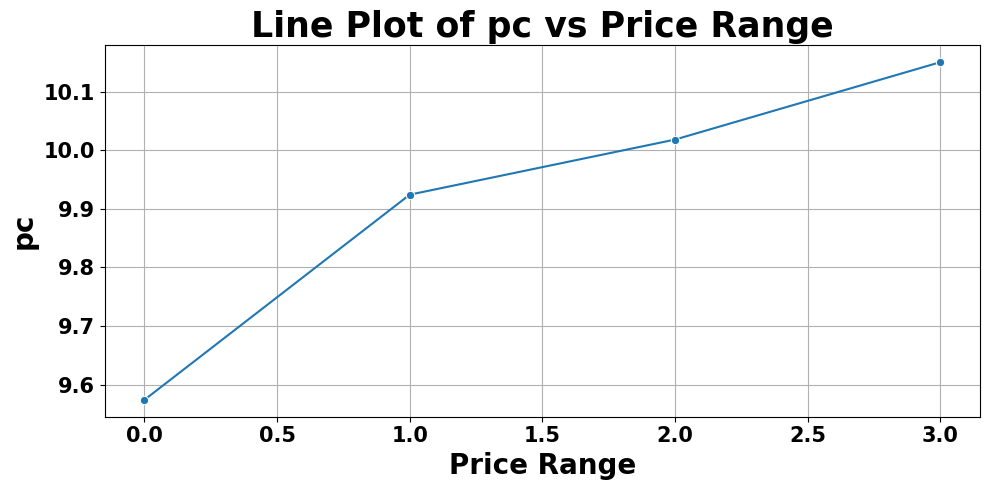

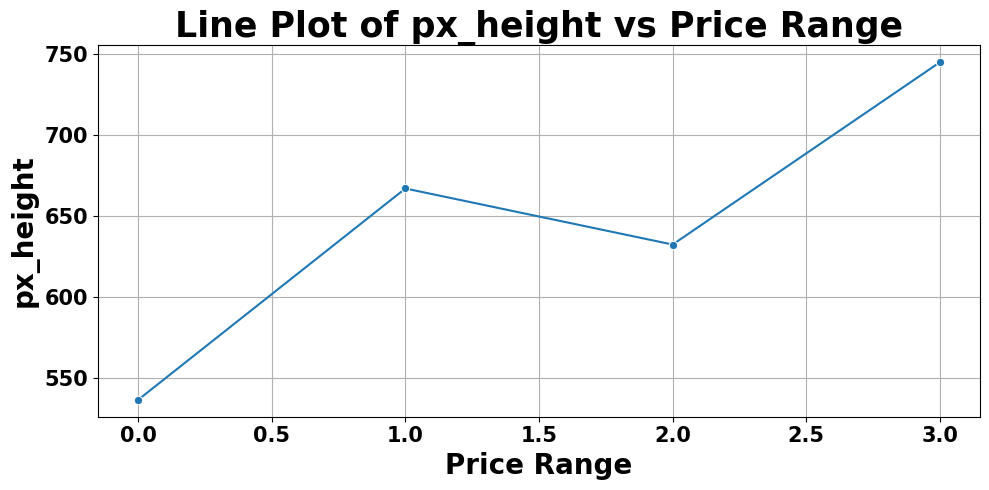

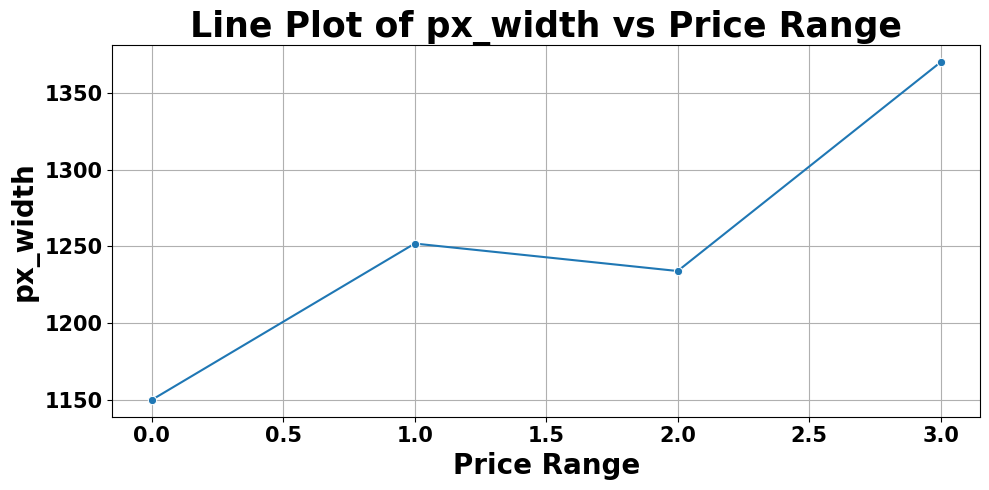

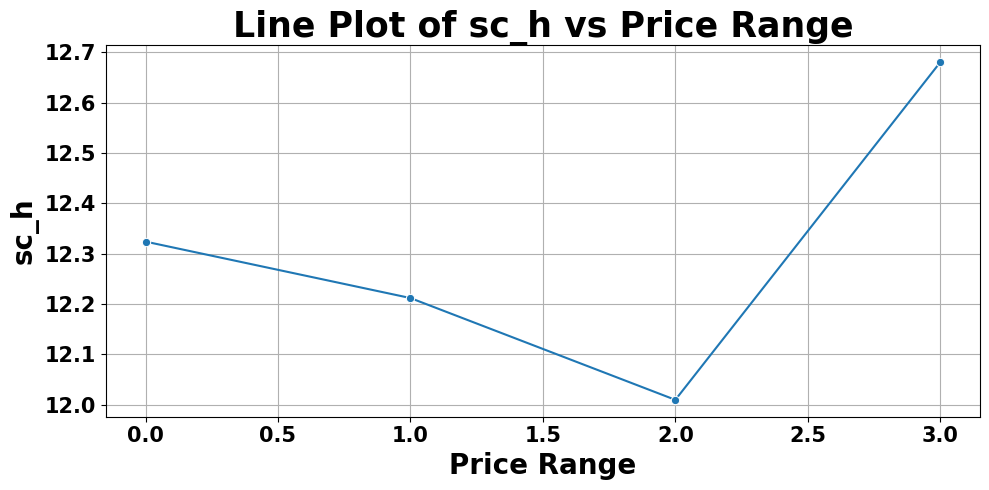

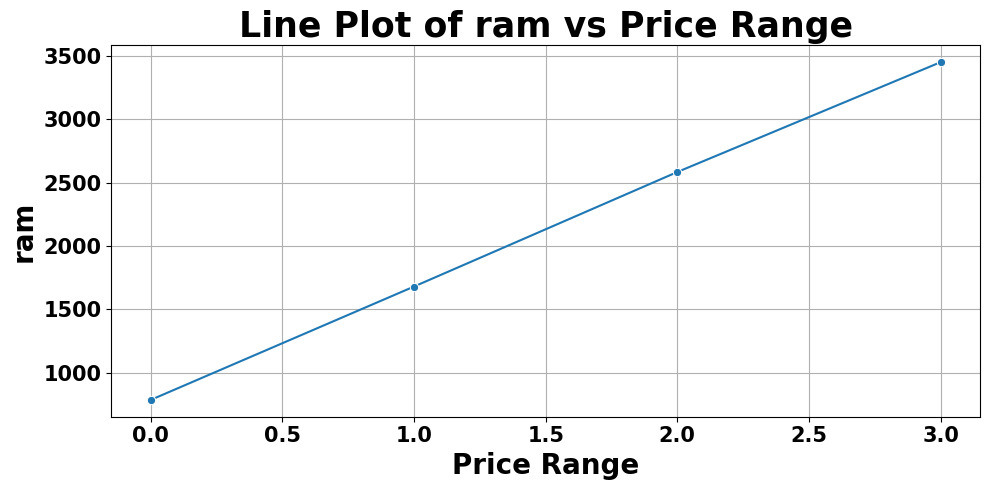

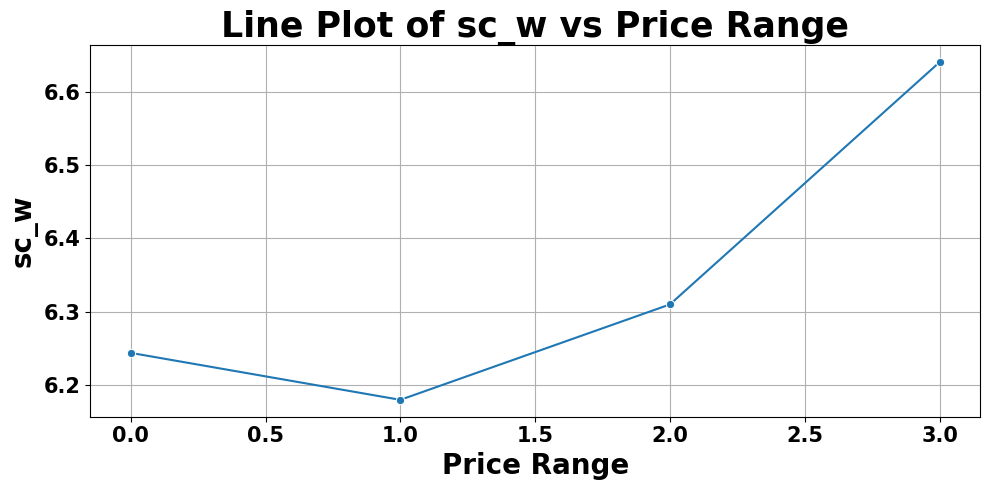

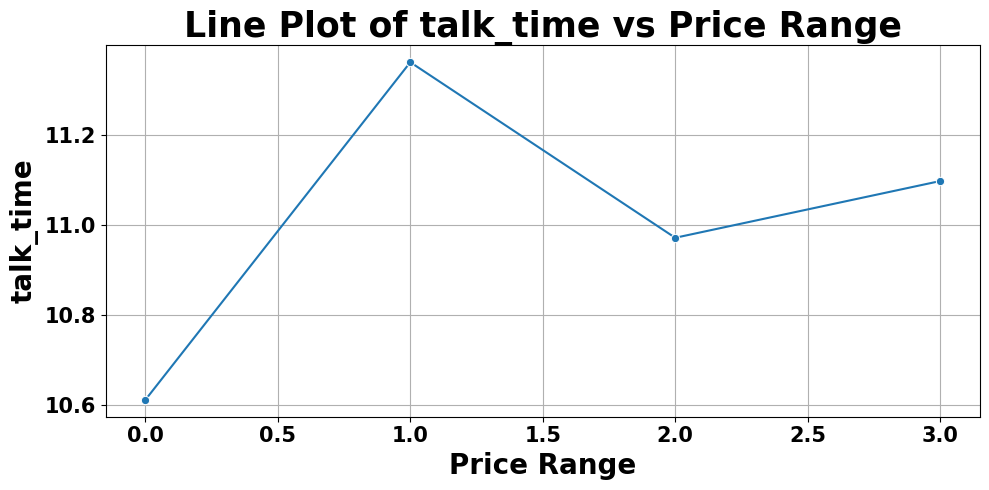

In [41]:
list_1 = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
          'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
          'sc_h', 'ram', 'sc_w', 'talk_time']

# Loop through each variable and plot line graph
for var in list_1:
    plt.figure(figsize=(10, 5))

    # Group by price_range and compute mean of the variable
    grouped_data = df.groupby('price_range')[var].mean().reset_index()

    # Line plot
    sns.lineplot(data=grouped_data, x='price_range', y=var, marker='o')

    plt.title(f"Line Plot of {var} vs Price Range")
    plt.xlabel("Price Range")
    plt.ylabel(var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


For class 1 and class2 battery power range is almost similar. As battery power increases price also increases whcih is quite obivious.
Mobiles in very high price range(Class 3) has less weight compared to other classes.That means as weight of mobiles decrease price increases.
Mobiles having max screen height and width falls in very high price category. We can see in linechart of sc_width and sc_height from class 2 screen width and hieght starts increasing with price. Similar case is with px_height and px_width. As resolution of screen increases the price also increases RAM has clear relationship with price range we saw that in correlation matrix also.

## Mobiles with both 3G and 4G.


In [42]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=df[(df['three_g']==1) & (df['four_g']==1)]

In [43]:
three_g_and_4g_df['price_range'].value_counts()

,count
price_range,
3.0,275
1.0,262
0.0,259
2.0,247


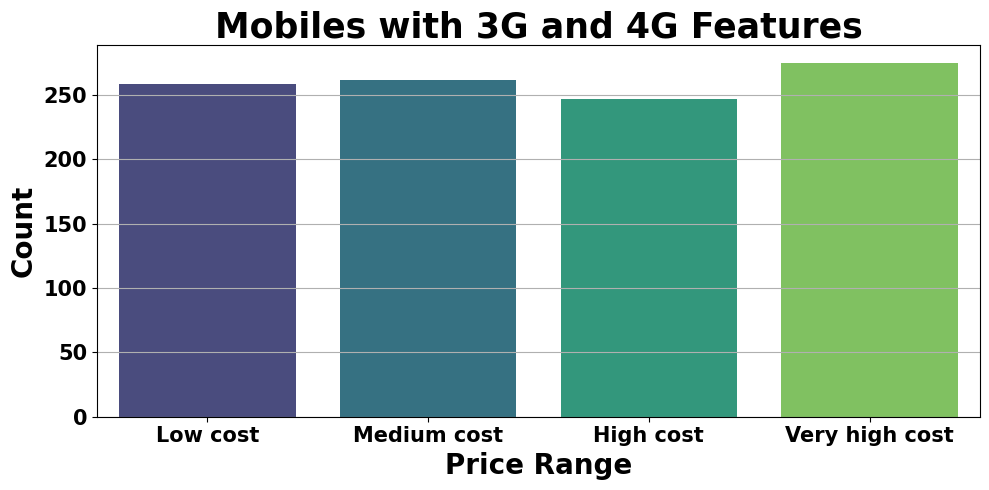

In [44]:
plt.figure(figsize=(10, 5))

# Countplot for price_range
sns.countplot(x='price_range', data=three_g_and_4g_df, palette='viridis')

# Customizing x-tick labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low cost', 'Medium cost', 'High cost', 'Very high cost'])

plt.title("Mobiles with 3G and 4G Features")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

* As we can see from low cost to very high cost mobiles have both features.

## Mobiles with 3G

In [45]:
three_g_df=df[(df['three_g']==1) & (df['four_g']!=1)]

In [46]:
three_g_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
5,1859.0,0.0,0.5,1.0,3.0,0.0,22.0,0.7,164.0,1.0,7.0,1004.0,1654.0,1067.0,17.0,1.0,10.0,1.0,0.0,0.0,1.0
7,1954.0,0.0,0.5,1.0,0.0,0.0,24.0,0.8,187.0,4.0,0.0,512.0,1149.0,700.0,16.0,3.0,5.0,1.0,1.0,1.0,0.0
8,1445.0,1.0,0.5,0.0,0.0,0.0,53.0,0.7,174.0,7.0,14.0,386.0,836.0,1099.0,17.0,1.0,20.0,1.0,0.0,0.0,0.0
12,1815.0,0.0,2.8,0.0,2.0,0.0,33.0,0.6,159.0,4.0,17.0,607.0,748.0,1482.0,18.0,3.0,2.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,1829.0,1.0,2.1,0.0,8.0,0.0,59.0,0.1,91.0,5.0,15.0,1457.0,1919.0,3142.0,16.0,6.0,5.0,1.0,1.0,1.0,3.0
1992,674.0,1.0,2.9,1.0,1.0,0.0,21.0,0.2,198.0,3.0,4.0,576.0,1809.0,1180.0,6.0,3.0,4.0,1.0,1.0,1.0,0.0
1993,1467.0,1.0,0.5,0.0,0.0,0.0,18.0,0.6,122.0,5.0,0.0,888.0,1099.0,3962.0,15.0,11.0,5.0,1.0,1.0,1.0,3.0
1994,858.0,0.0,2.2,0.0,1.0,0.0,50.0,0.1,84.0,1.0,2.0,528.0,1416.0,3978.0,17.0,16.0,3.0,1.0,1.0,0.0,3.0


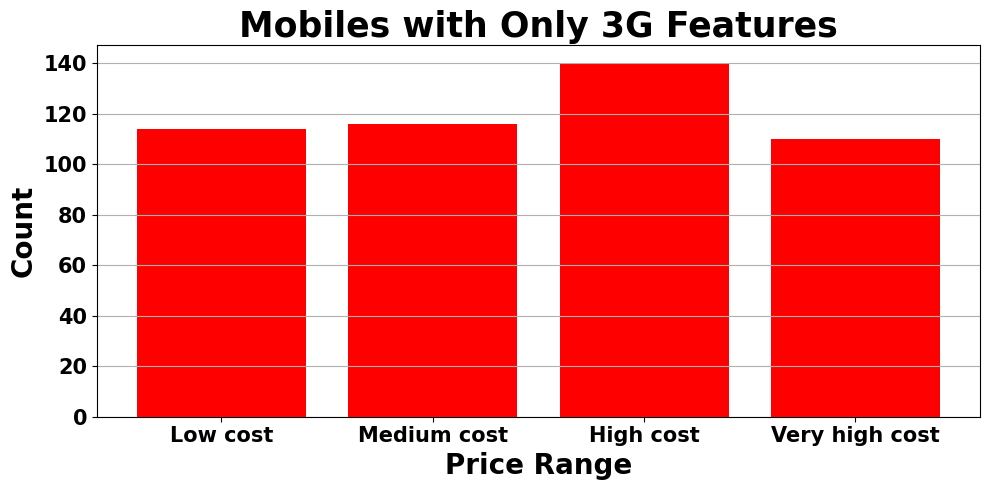

In [47]:
# Count occurrences of each price range in three_g_df
price_counts = three_g_df['price_range'].value_counts().sort_index()

# Define labels
labels = ['Low cost', 'Medium cost', 'High cost', 'Very high cost']

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(price_counts.index, price_counts.values, color='red')

# Custom x-tick labels
plt.xticks(ticks=[0, 1, 2, 3], labels=labels)

plt.title("Mobiles with Only 3G Features")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Insights we found:

* Mobiles which has very high cost are very less likely to have 3G.
* There are more chances that high cost mobile will have 3G in it.

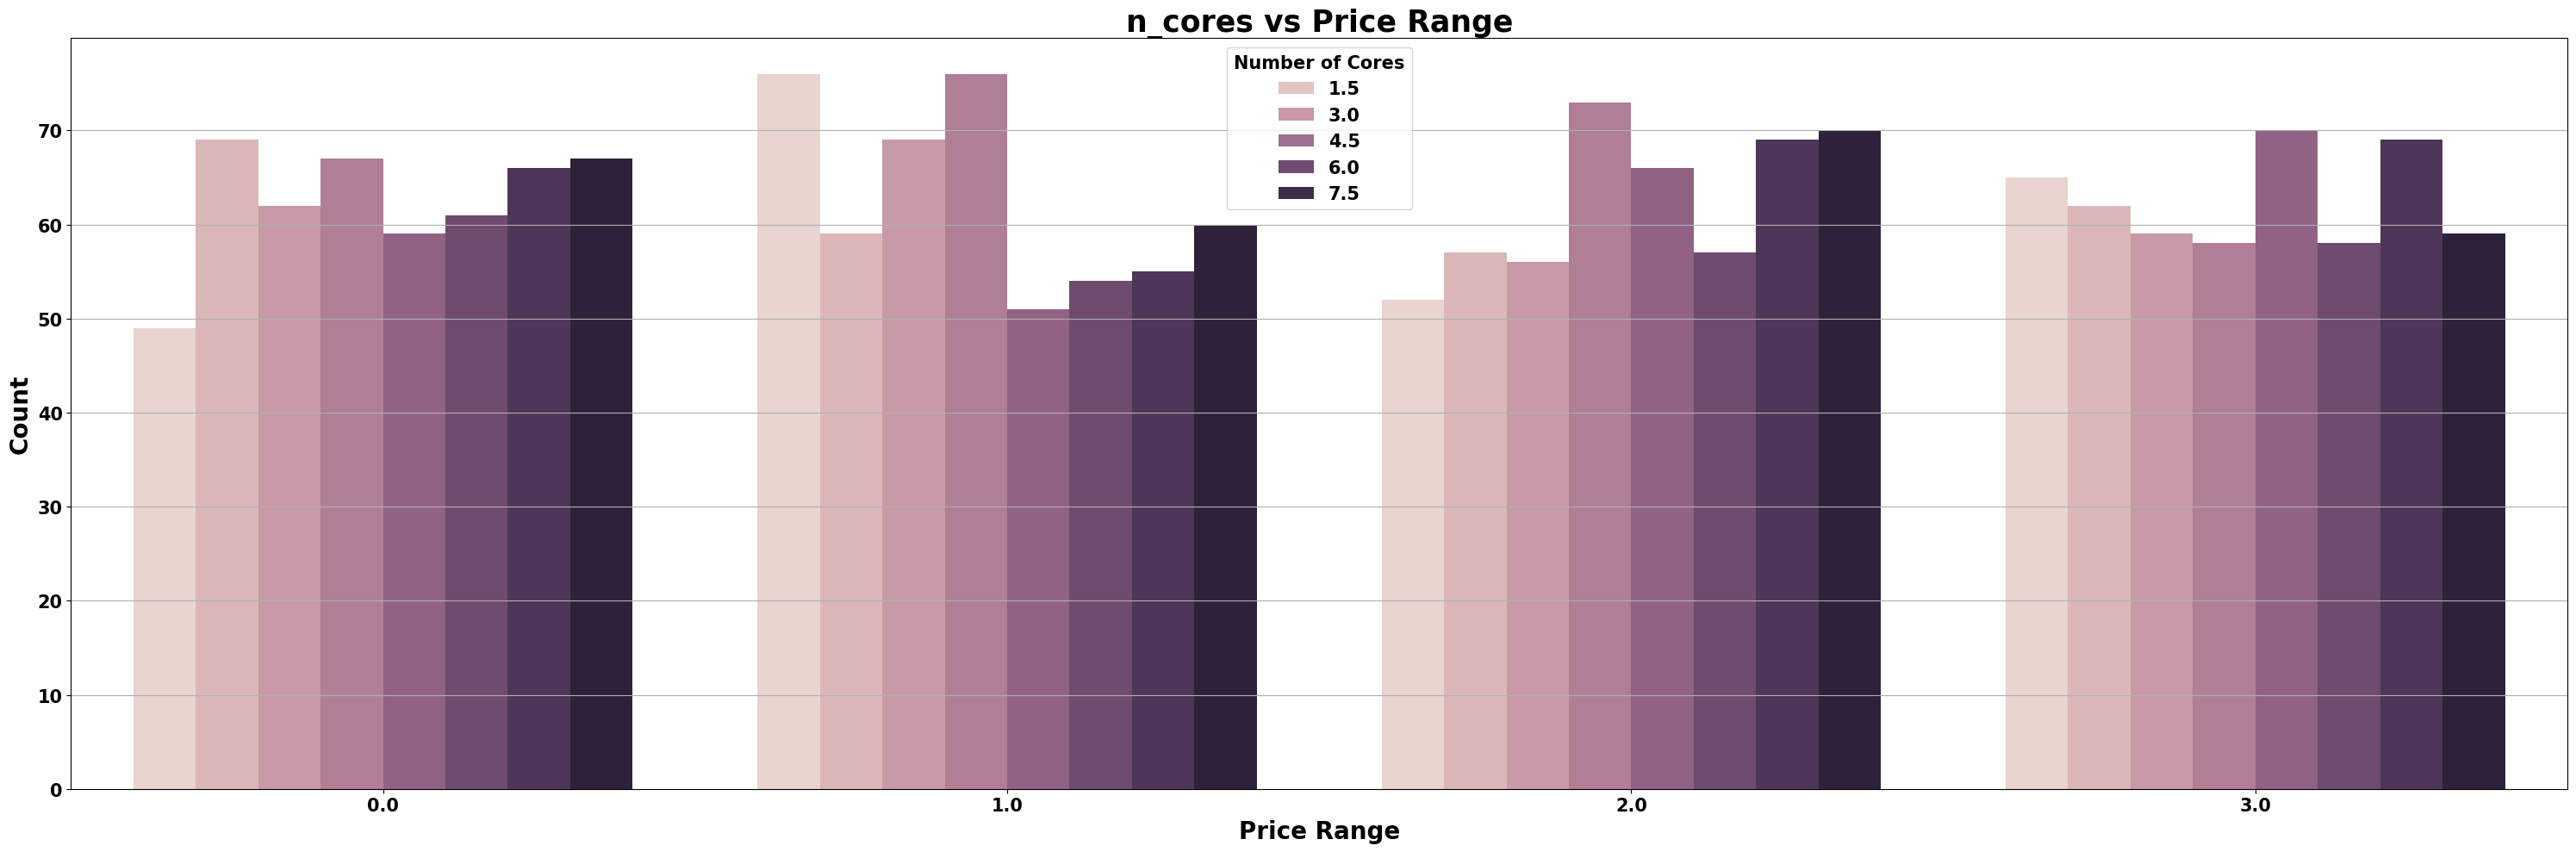

In [48]:
plt.figure(figsize=(30, 10))
sns.countplot(x='price_range', hue='n_cores', data=df)

plt.title("n_cores vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.legend(title='Number of Cores', loc='best')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Observations:

* Price range 0 has majority of phones with 2 core processors
* Price range 1 has majority of phones with 1 and 4 core processors
* Price range 2 has majority of phones with 4 core processors
* Price range 3 has majority of phones with 5 and 7 core processors

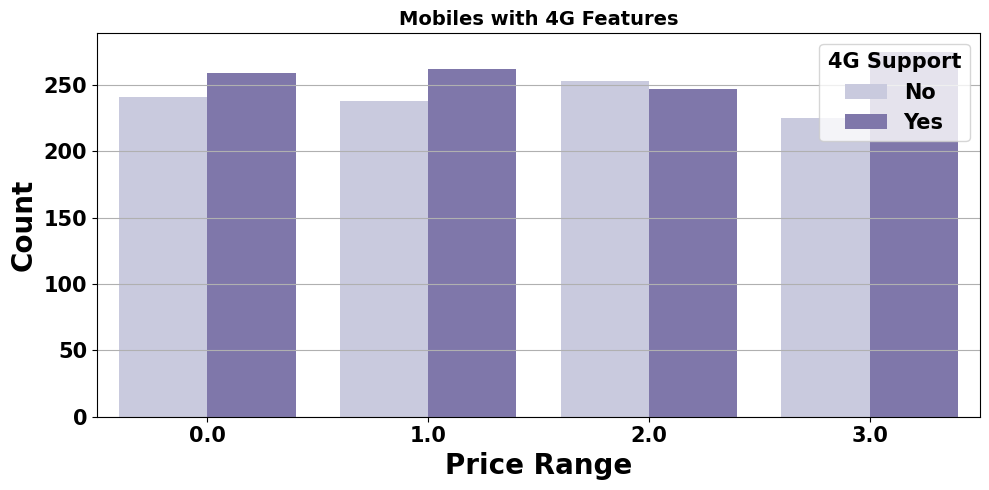

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(x='price_range', hue='four_g', data=df, palette='Purples')

plt.title("Mobiles with 4G Features", fontsize=14)
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.legend(title='4G Support', labels=['No', 'Yes'], loc='best')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

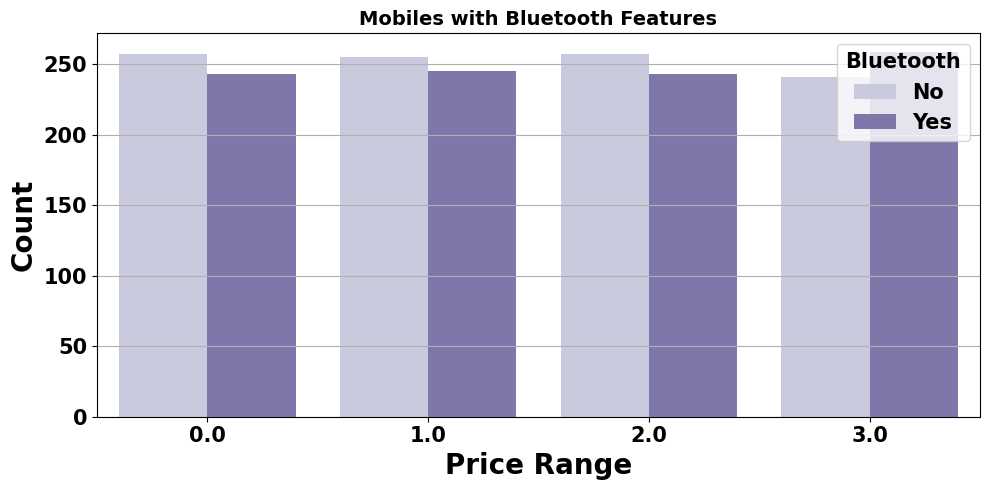

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(x='price_range', hue='blue', data=df, palette='Purples')

plt.title("Mobiles with Bluetooth Features", fontsize=14)
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.legend(title='Bluetooth', labels=['No', 'Yes'], loc='best')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### **Identify outliers**

In [51]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [52]:
# numeric col list
numeric_col=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',]

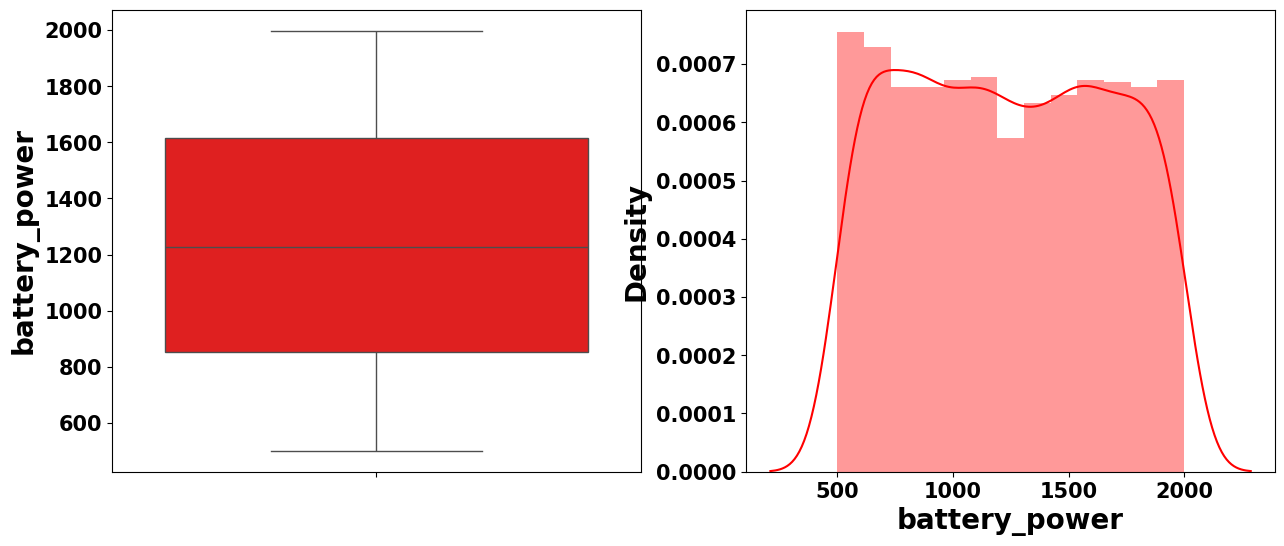

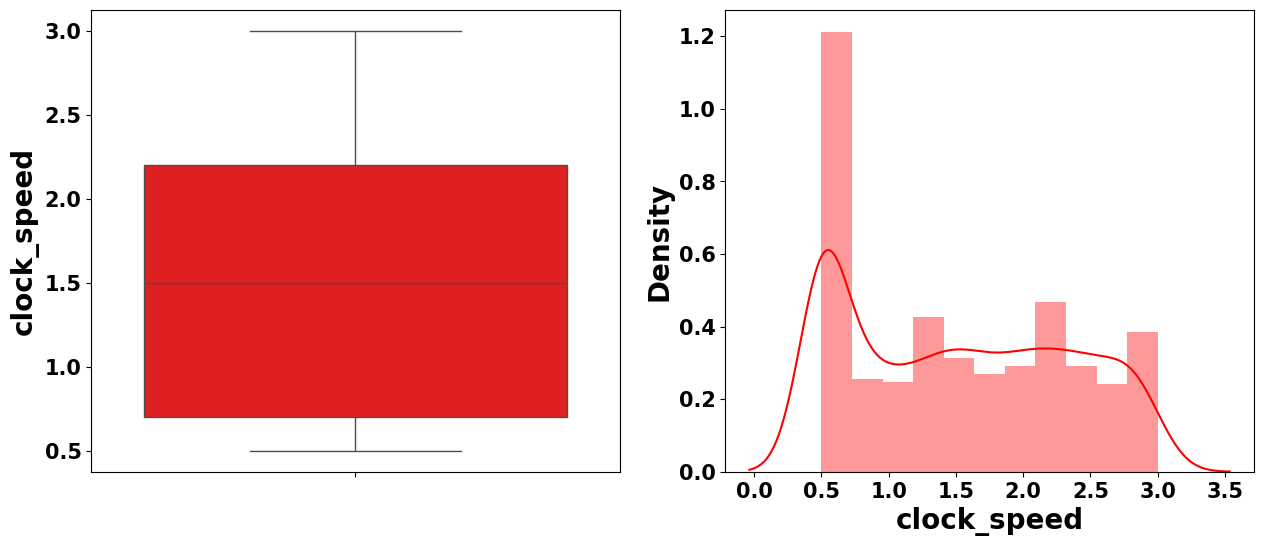

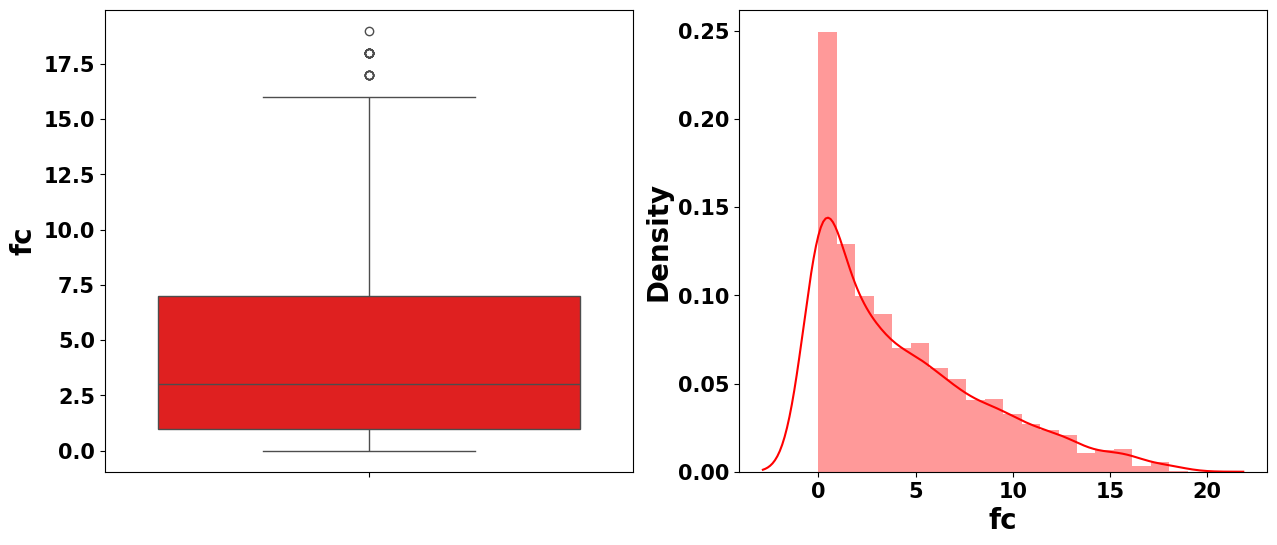

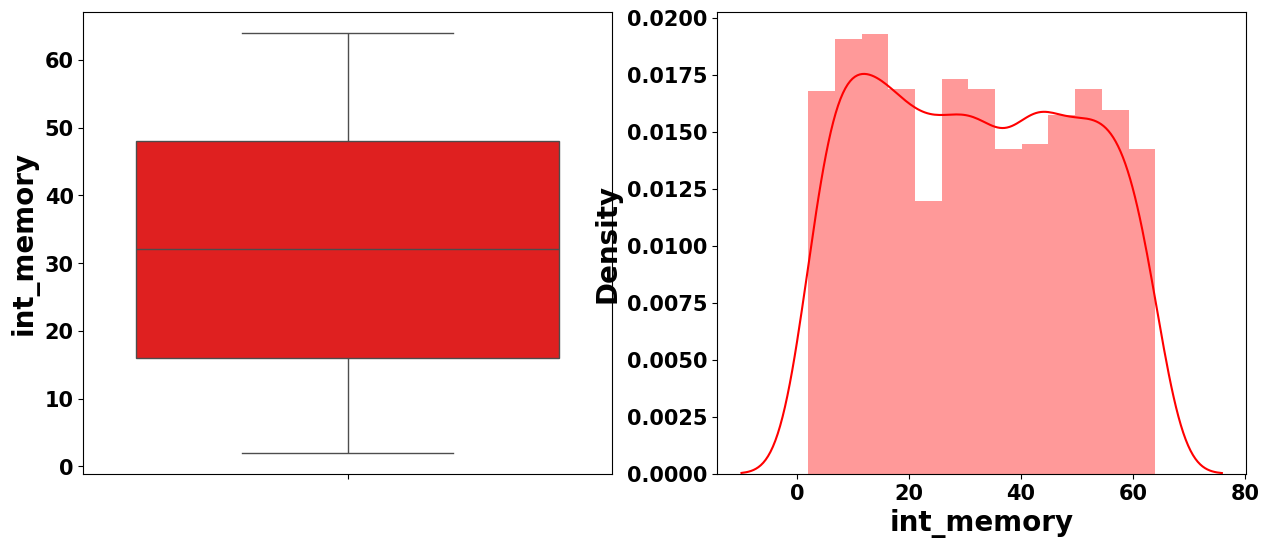

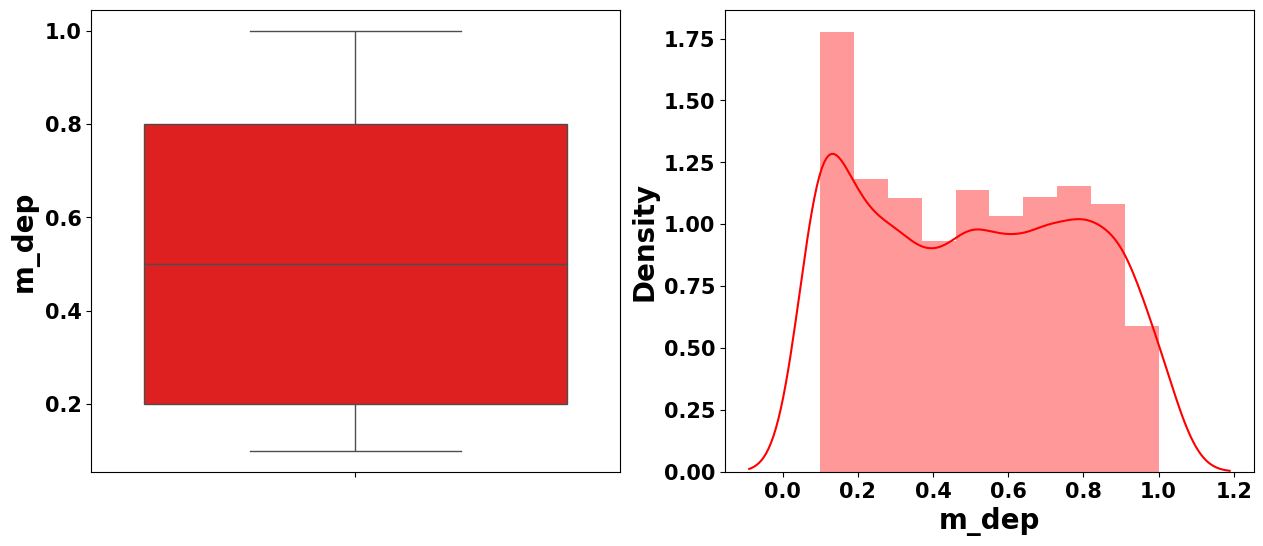

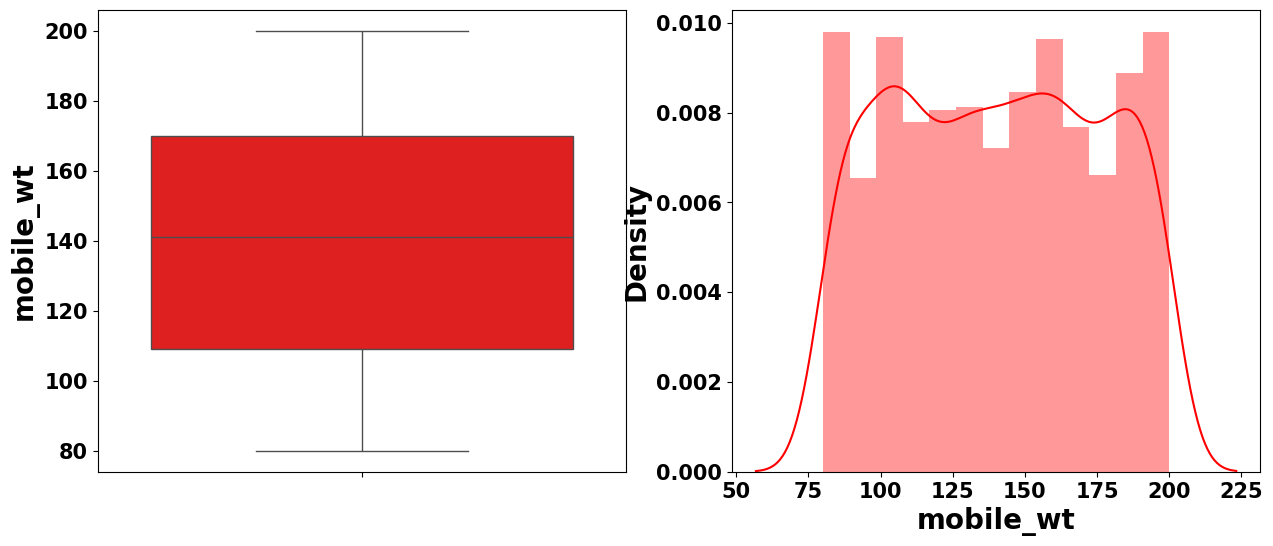

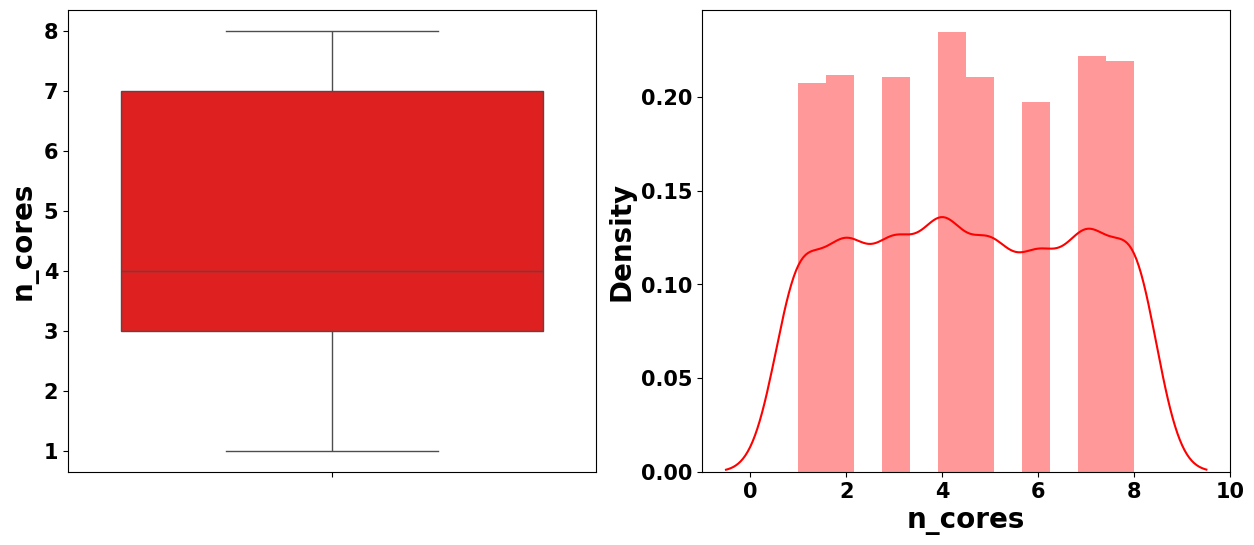

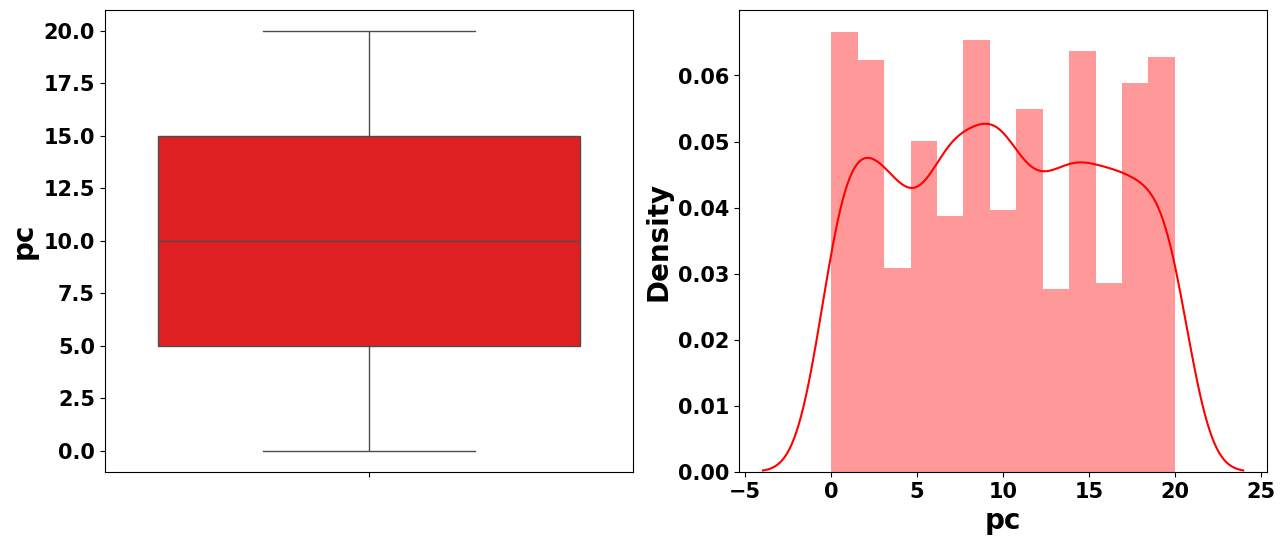

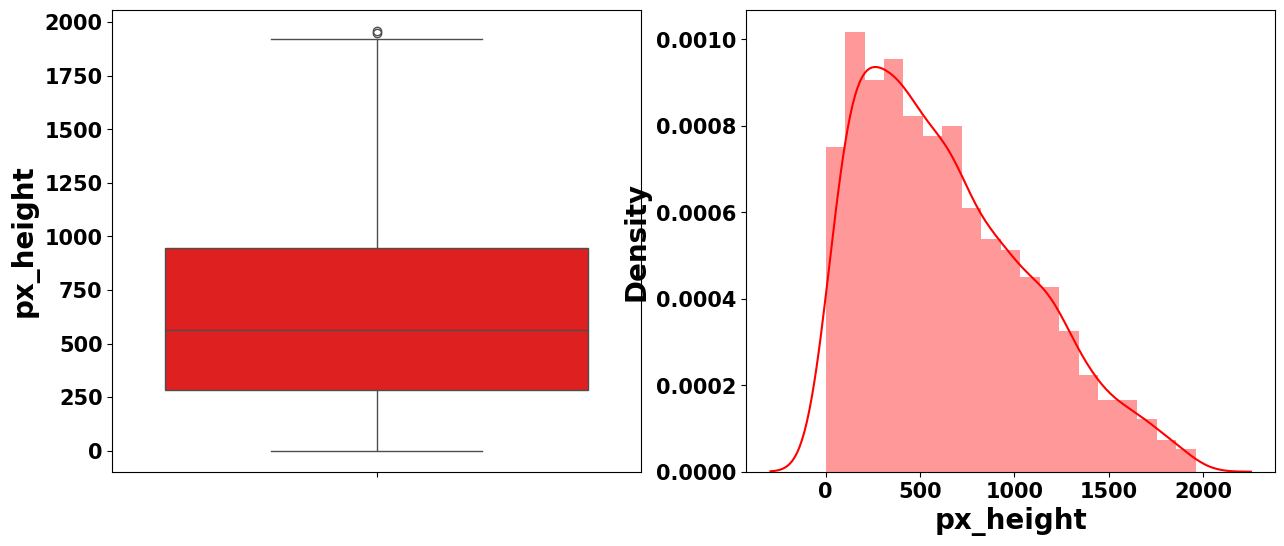

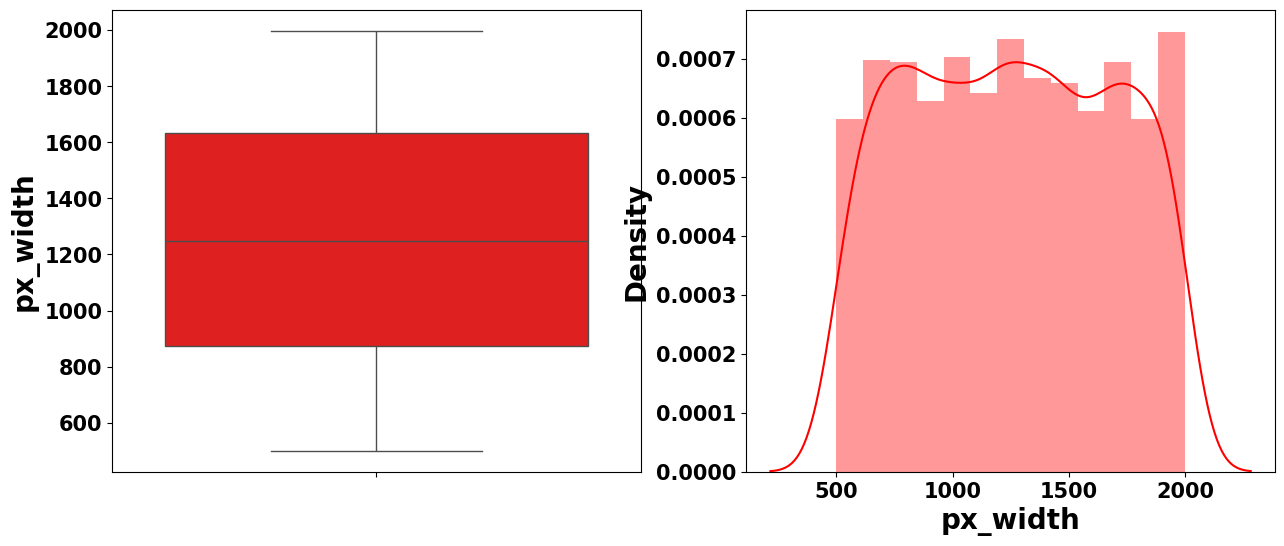

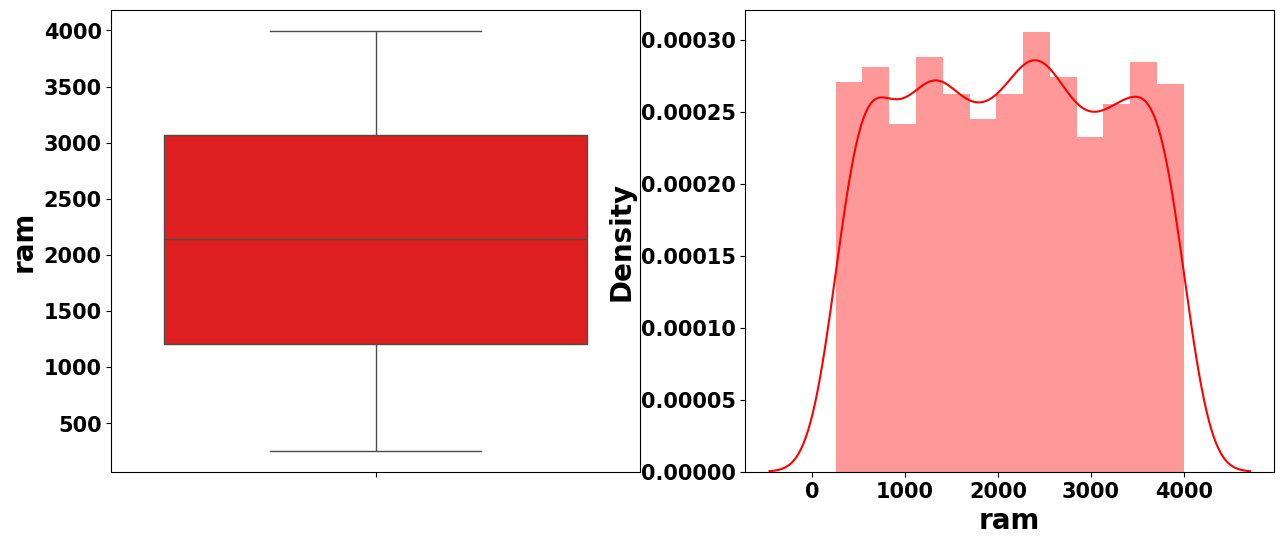

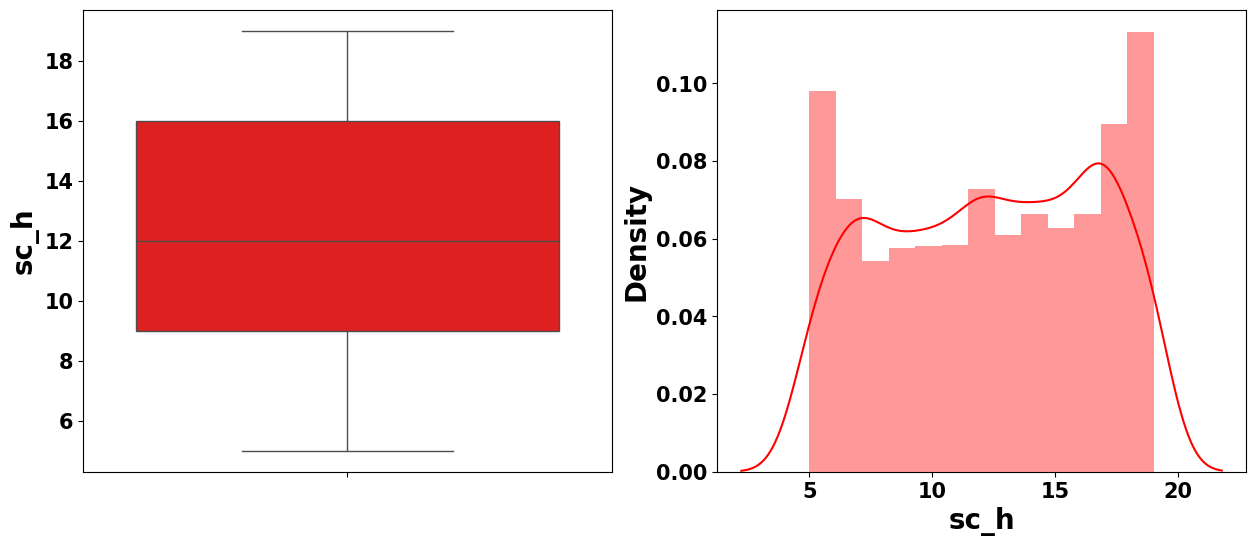

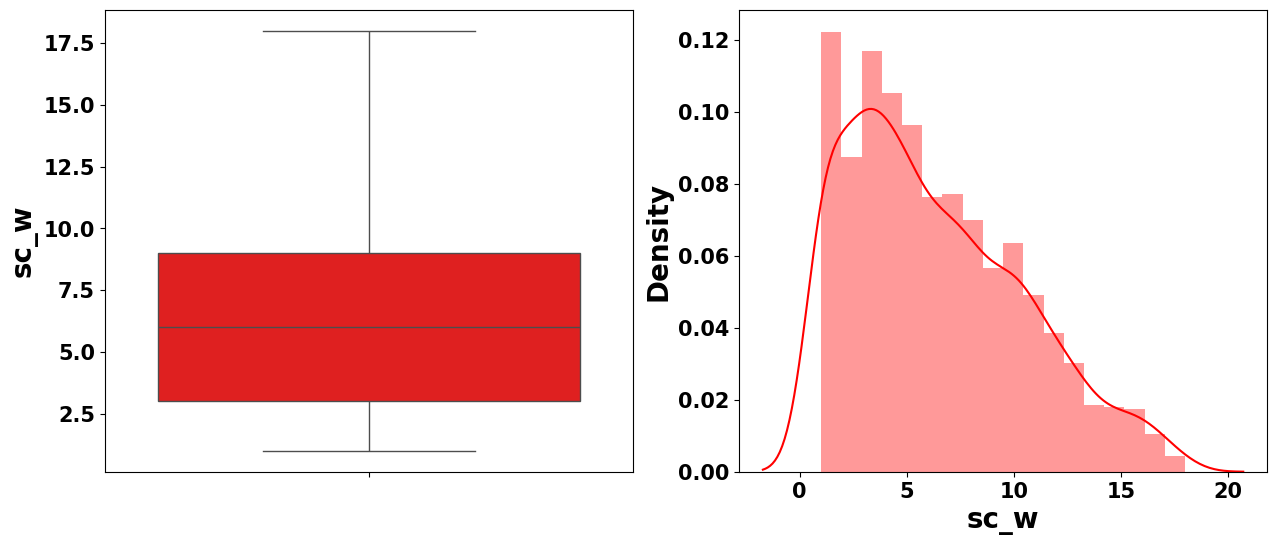

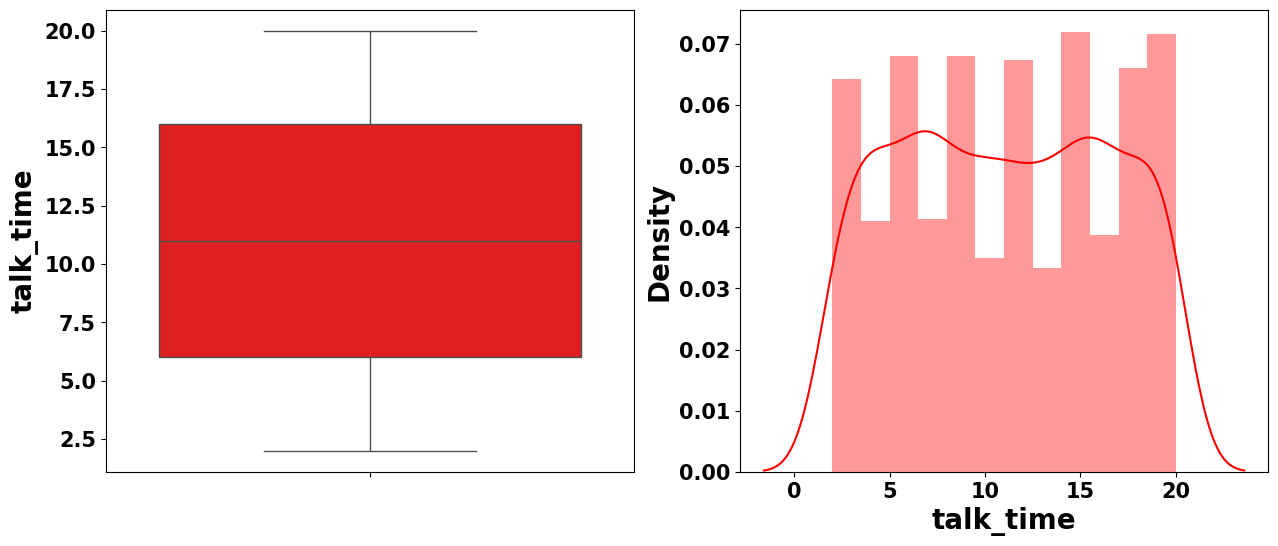

In [53]:
# plotting boXplot and distribution
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='red')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='red')

    fig.set_xlabel(var)

    plt.show()

* Data is well distrubted.
* fc and px_height has some outliers.

In [54]:
Q1 = df["fc"].quantile(0.25)
Q3 = df['fc'].quantile(0.991)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['fc'] <= Q3)]

In [55]:
Q1 = df["px_height"].quantile(0.25)
Q3 = df['px_height'].quantile(0.991)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['px_height'] <= Q3)]

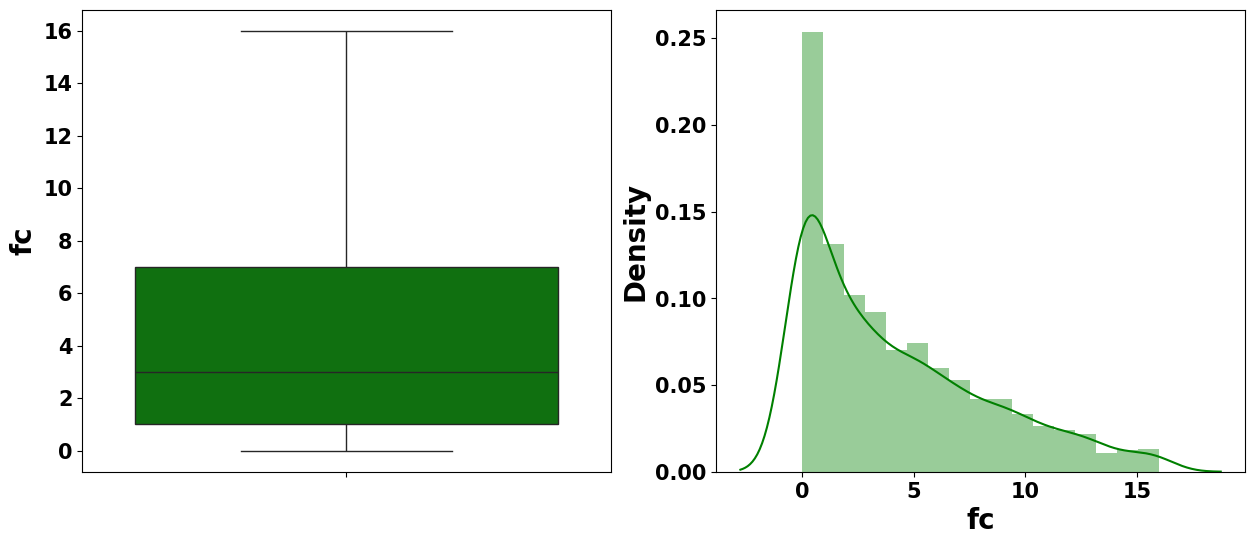

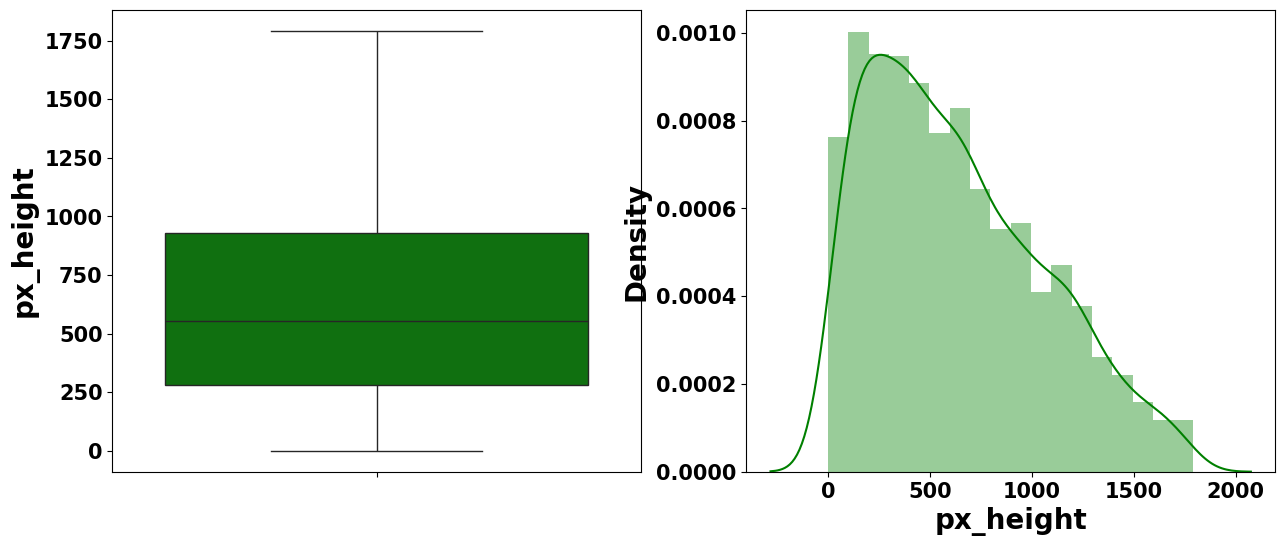

In [56]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='green')
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='green')

    fig.set_xlabel(var)

    plt.show()

So, here we are seeing there is no outliers present

* So we have some outliers in plot

* This was just a customer who has an excellent payment history. So we have only one row so we think this a valid row.

## Feature Selection

<Axes: >

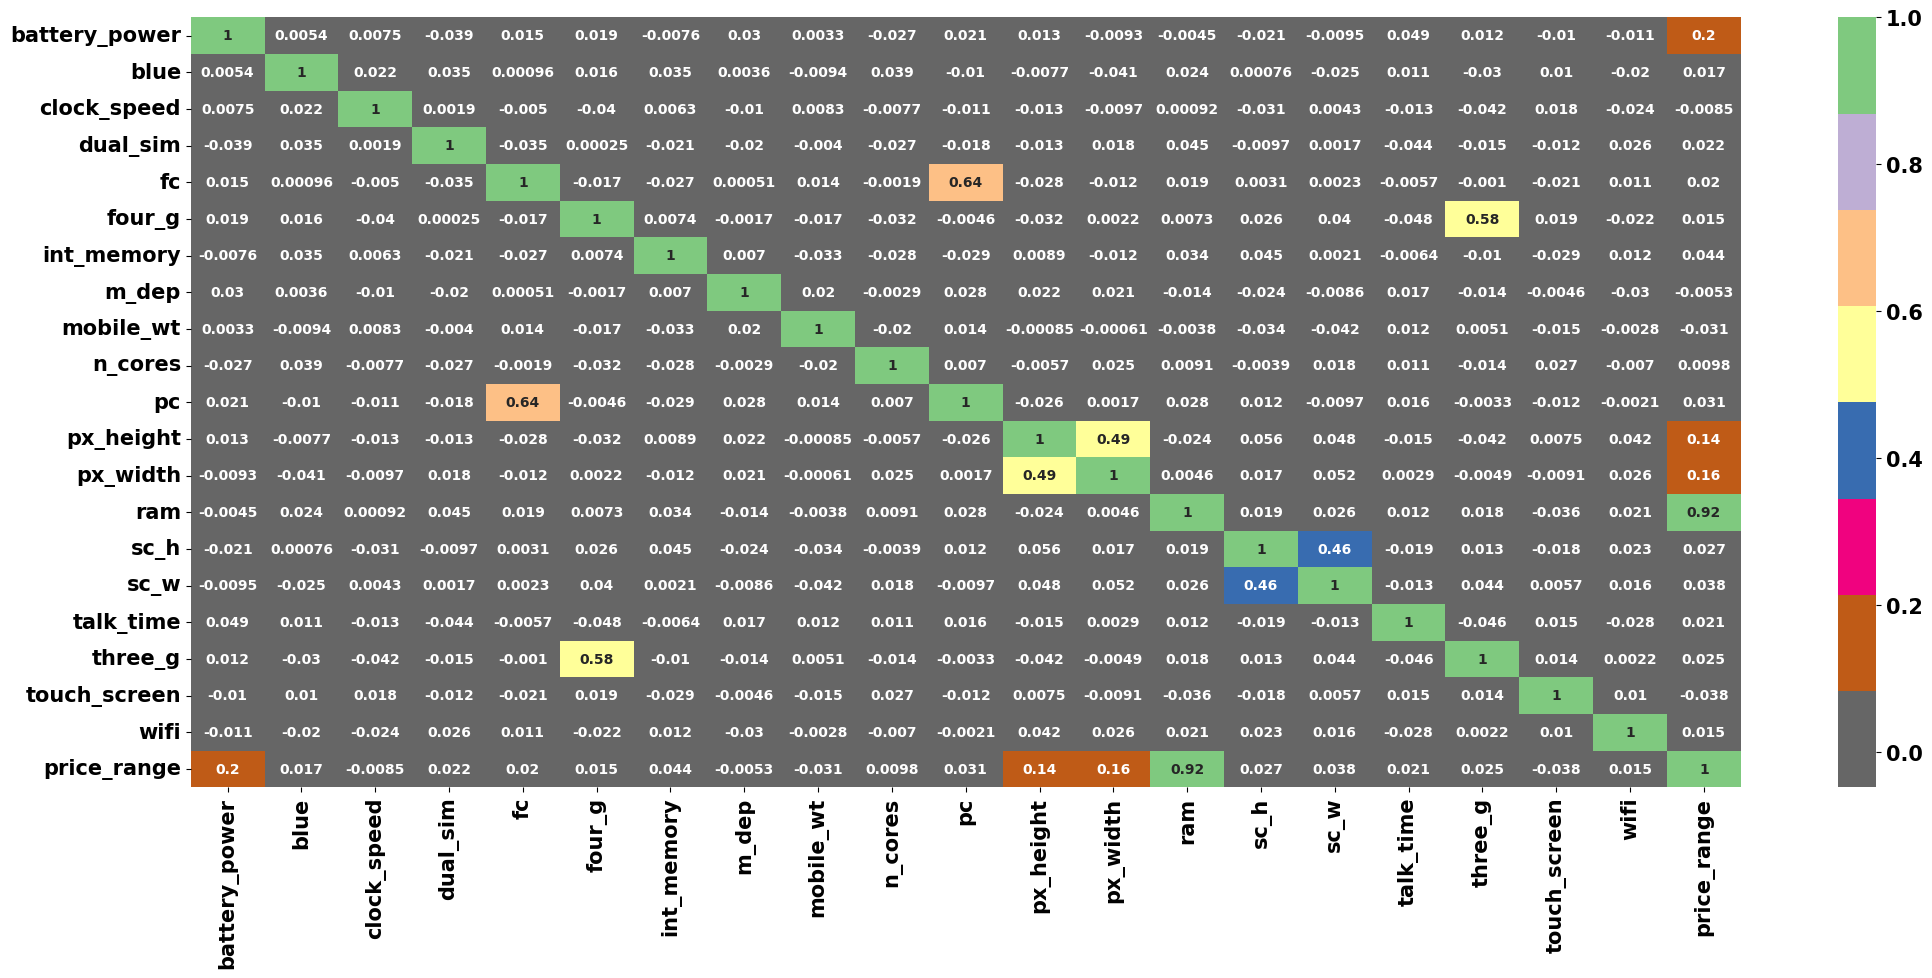

In [57]:
corr= df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

## **Prepare for Modeling**

### **1. Feature Engineering**

### **2. Feature Selection**

In [58]:
# Separating X variables(indpendent variables) and Y(dependent variable) variable.
X=df.drop('price_range',axis=1)
y=df["price_range"]

## **Classification Predictive Modeling(Model - 1)**

### **1. Logistic Regression**

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [60]:
# Features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize and fit model
log_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train_scaled, y_train)

# Logistic Regression model
log_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
log_model.fit(X_train_smt, y_train_smt)

# Predictions
y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Training Accuracy Score:", log_model.score(X_train_smt, y_train_smt))
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training Accuracy Score: 0.9753164556962025
Testing Accuracy Score: 0.9821882951653944

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        99
         1.0       0.99      0.98      0.98        99
         2.0       0.98      0.96      0.97        98
         3.0       0.97      0.99      0.98        97

    accuracy                           0.98       393
   macro avg       0.98      0.98      0.98       393
weighted avg       0.98      0.98      0.98       393

Confusion Matrix:
 [[99  0  0  0]
 [ 1 97  1  0]
 [ 0  1 94  3]
 [ 0  0  1 96]]


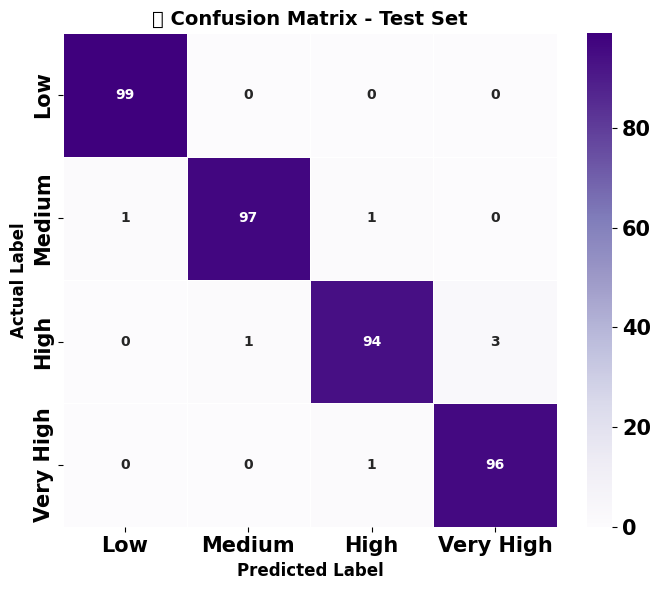

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cf_matrix = np.array([
    [99,  0,  0,  0],
    [ 1, 97,  1,  0],
    [ 0,  1, 94,  3],
    [ 0,  0,  1, 96]
])

# Define class labels
class_labels = ['Low', 'Medium', 'High', 'Very High']

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_labels, yticklabels=class_labels, linewidths=0.5)

# Add titles and labels
plt.title('📊 Confusion Matrix - Test Set', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()



# Insights we found
* Training Accuracy Score: 97%

* Testing Accuracy Score: 98%

# LogisticRegression Using hyperparameter tuning

In [72]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

# Features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a pipeline including scaling, SMOTE, and logistic regression
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(multi_class='multinomial', max_iter=1000))
])

# Define the parameter grid to search
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__solver': ['lbfgs', 'saga', 'newton-cg']
}

# Apply GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Predictions and evaluation
y_pred = grid.predict(X_test)
print("Training Accuracy Score:", grid.score(X_train, y_train))
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'logreg__C': 10, 'logreg__solver': 'lbfgs'}
Training Accuracy Score: 0.9859961807765755
Testing Accuracy Score: 0.9694656488549618

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        99
         1.0       0.98      0.96      0.97        99
         2.0       0.95      0.94      0.94        98
         3.0       0.96      0.98      0.97        97

    accuracy                           0.97       393
   macro avg       0.97      0.97      0.97       393
weighted avg       0.97      0.97      0.97       393

 Confusion Matrix:
 [[99  0  0  0]
 [ 1 95  3  0]
 [ 0  2 92  4]
 [ 0  0  2 95]]


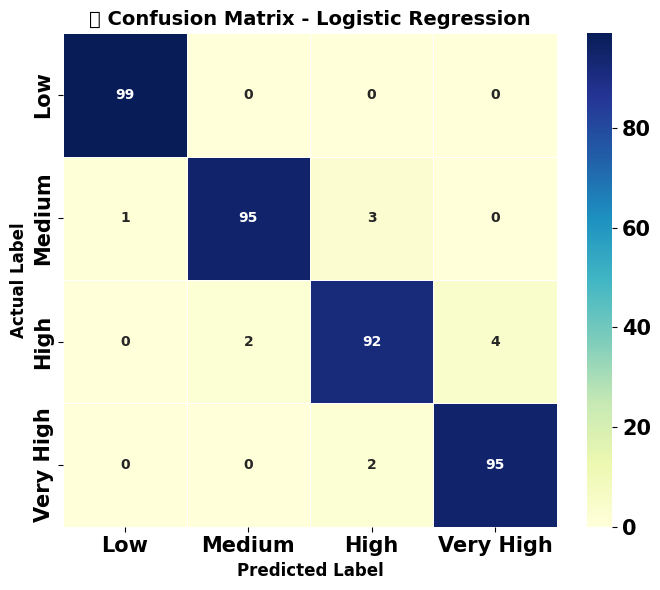

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values
cf_matrix = np.array([
    [99,  0,  0,  0],
    [ 1, 95,  3,  0],
    [ 0,  2, 92,  4],
    [ 0,  0,  2, 95]
])

# Class labels
class_labels = ['Low', 'Medium', 'High', 'Very High']

# Plotting
plt.figure(figsize=(7, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_labels, yticklabels=class_labels, linewidths=0.5)

plt.title(' Confusion Matrix - Logistic Regression', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()


# Insights we found
* Training Accuracy Score: 98%

* Testing Accuracy Score: 96%

## **Classification Predictive Modeling(Model - 2)**

### **RANDOM FOREST**

Training Accuracy Score: 1.0
Testing Accuracy Score: 0.8753180661577609

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97        99
         1.0       0.88      0.87      0.87        99
         2.0       0.81      0.74      0.78        98
         3.0       0.86      0.90      0.88        97

    accuracy                           0.88       393
   macro avg       0.87      0.88      0.87       393
weighted avg       0.87      0.88      0.87       393

Confusion Matrix:
 [[98  1  0  0]
 [ 6 86  7  0]
 [ 0 11 73 14]
 [ 0  0 10 87]]


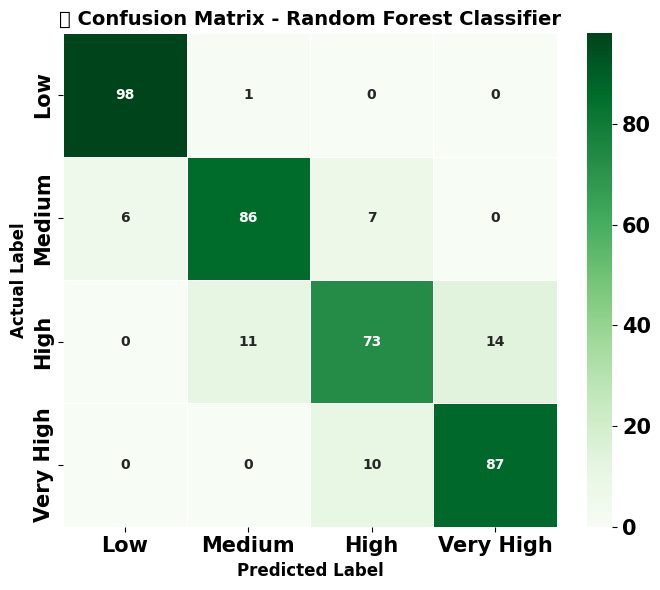

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Split into features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train_scaled, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smt, y_train_smt)

# Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
print("Training Accuracy Score:", rf_model.score(X_train_smt, y_train_smt))
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf_matrix)

# Plot confusion matrix
class_labels = ['Low', 'Medium', 'High', 'Very High']
plt.figure(figsize=(7, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels, linewidths=0.5)
plt.title(' Confusion Matrix - Random Forest Classifier', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()


* Train accuarcy is 100% and test accuracy is 87%. which is quite good. But model seems to be overfitted and has not generalised the data well.
* We need to reduce overfitting and improve the model performance.
we do some hyperparameter tunning to reduce overfitting

# Random Forest Using hyperparameter tuning



---



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Training Accuracy Score: 1.0
Testing Accuracy Score: 0.8931297709923665

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        99
         1.0       0.87      0.92      0.89        99
         2.0       0.87      0.77      0.82        98
         3.0       0.89      0.91      0.90        97

    accuracy                           0.89       393
   macro avg       0.89      0.89      0.89       393
weighted avg       0.89      0.89      0.89       393

Confusion Matrix:
 [[97  2  0  0]
 [ 6 91  2  0]
 [ 0 12 75 11]
 [ 0  0  9 88]]


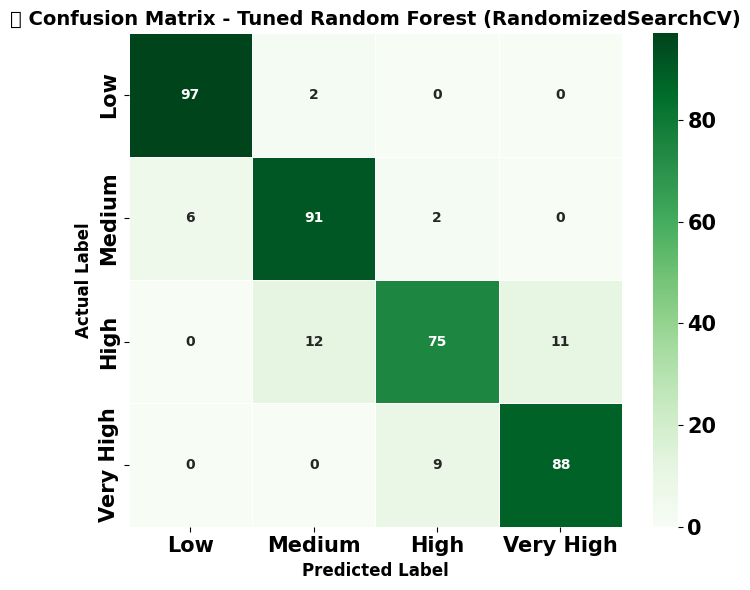

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
X = df.drop('price_range', axis=1)
y = df['price_range']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train_scaled, y_train)

# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=20,        # Try 20 random combinations
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train_smt, y_train_smt)
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predict and Evaluate
y_pred = best_rf.predict(X_test_scaled)
print("Training Accuracy Score:", best_rf.score(X_train_smt, y_train_smt))
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf_matrix)

# Plot heatmap
class_labels = ['Low', 'Medium', 'High', 'Very High']
plt.figure(figsize=(7, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels, linewidths=0.5)
plt.title('📊 Confusion Matrix - Tuned Random Forest (RandomizedSearchCV)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()


## Insights found:
 Before Tuning

* Training accuarcy = 100%

* Test accuarcy = 87%

Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

After tuning:

* Training accuarcy= 100%

* Test accuarcy = 89%

Overfitting is slightly reduced

## **Classification Predictive Modeling(Model - 3)**

### **Decision Tree Classifier**

In [73]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE


# Features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train_scaled, y_train)

# Individual models with tuned parameters
log_clf = LogisticRegression(C=10, solver='lbfgs', max_iter=1000, multi_class='multinomial')
rf_clf = RandomForestClassifier(n_estimators=300, min_samples_split=5,
                                min_samples_leaf=1, max_depth=30, bootstrap=False, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', log_clf),
        ('rf', rf_clf),
        ('dt', dt_clf)
    ],
    voting='hard'  # Can also use 'soft' if using probabilistic predictions
)

# Train the ensemble model
voting_clf.fit(X_train_smt, y_train_smt)

# Predict on test data
y_pred = voting_clf.predict(X_test_scaled)

# Evaluation
print(" Training Accuracy Score:", voting_clf.score(X_train_smt, y_train_smt))
print(" Testing Accuracy Score:", accuracy_score(y_test, y_pred))

print("\n Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Training Accuracy Score: 1.0
 Testing Accuracy Score: 0.926208651399491

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        99
         1.0       0.92      0.93      0.92        99
         2.0       0.93      0.82      0.87        98
         3.0       0.90      0.96      0.93        97

    accuracy                           0.93       393
   macro avg       0.93      0.93      0.92       393
weighted avg       0.93      0.93      0.93       393

 Confusion Matrix:
 [[99  0  0  0]
 [ 5 92  2  0]
 [ 0  8 80 10]
 [ 0  0  4 93]]


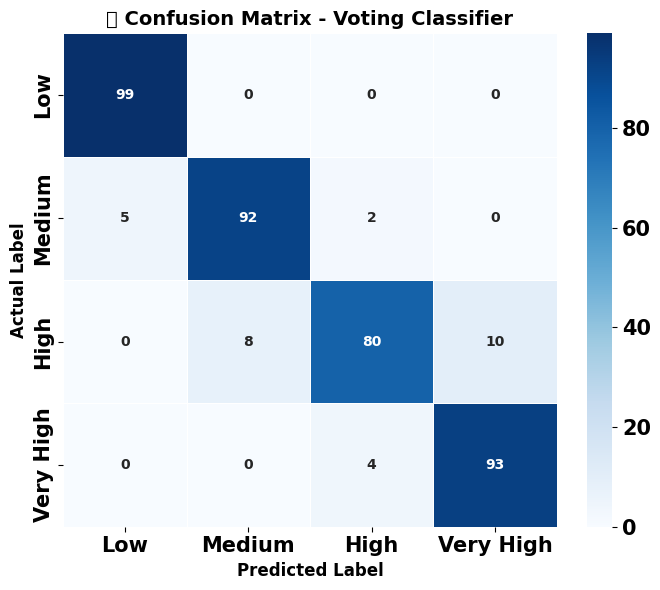

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Updated confusion matrix from your Voting Classifier
cf_matrix = np.array([
    [99,  0,  0,  0],
    [ 5, 92,  2,  0],
    [ 0,  8, 80, 10],
    [ 0,  0,  4, 93]
])

# Class labels
class_labels = ['Low', 'Medium', 'High', 'Very High']

# Plot the heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, linewidths=0.5)

plt.title(' Confusion Matrix - Voting Classifier', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()


* Train set accuracy is 100% and test accuracy is 92%.
* Model is overfitted on train set and did not generalised well.
* We will tune hyperparamters to reduce overfitting and try to imporve the model performance.

## Decision Tree Using hyperparameter tuning

In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Prepare your features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define base models
log_clf = LogisticRegression(C=10, solver='lbfgs', max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, min_samples_leaf=1, random_state=42)

# Voting classifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', log_clf),
    ('rf', rf_clf),
    ('dt', dt_clf)
], voting='hard', n_jobs=-1)

# Pipeline with scaler, SMOTE, and voting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('voting', voting_clf)
])

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print(" Training Accuracy Score:", pipeline.score(X_train, y_train))
print(" Testing Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Training Accuracy Score: 0.9993634627625716
 Testing Accuracy Score: 0.9287531806615776

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        99
         1.0       0.92      0.92      0.92        99
         2.0       0.91      0.88      0.90        98
         3.0       0.94      0.94      0.94        97

    accuracy                           0.93       393
   macro avg       0.93      0.93      0.93       393
weighted avg       0.93      0.93      0.93       393

 Confusion Matrix:
 [[97  2  0  0]
 [ 6 91  2  0]
 [ 0  6 86  6]
 [ 0  0  6 91]]


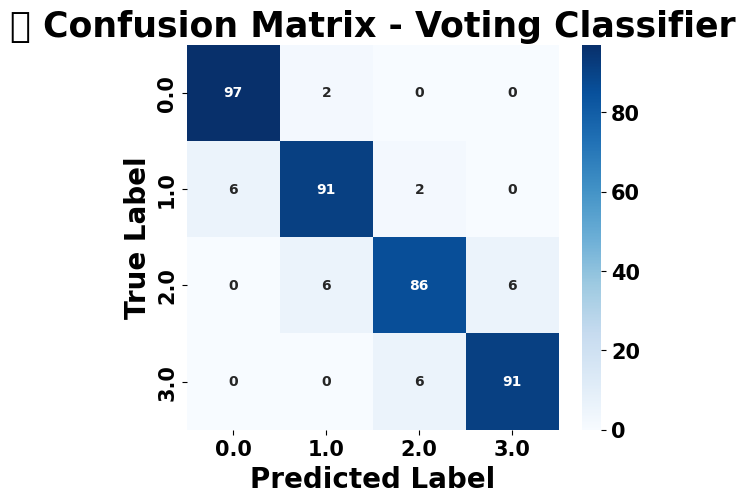

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(" Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Insights we found:

* Train accuarcy has been reduced to 99% from 100% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.

* RAM,battery power,px_height and width came out to be the most important featrures



# **Conclusion:-**

* We Started with Data understanding, data wrangling, basic EDA where we found the relationship trends between price range and other independent variables.

* We selected the best features for predictive modeling by using K best feature selection method using Chi square statistic.

* Implemented various classification algorithms, out of which the LogisticRegression algorithm gave the best performance after hyper-parameter tuning with 98% train accuracy and 96% test accuracy.

* Decision Tree Classifier is the second best good model which gave good performance after hyper-parameter tuning with 99% train accuracy and 92% test accuracy score.
KNN gave very worst model performance.

* We checked for the feature importance's of each model. RAM, Battery Power, Px_height and px_width contributed the most while predicting the price range.